# Analysis of Ironman 70.3 races from 2004 to 2020

Dataset URL: https://www.kaggle.com/code/aiaiaidavid/analysis-of-ironman-70-3-races-from-2004-to-2020

Group 1

Team Members: Elena, Pablo, Gabriel

In [1]:
import pandas as pd
data = pd.read_csv("../dataset/Half_Ironman_df6.csv")
data

,Gender,AgeGroup,AgeBand,Country,CountryISO2,EventYear,EventLocation,SwimTime,Transition1Time,BikeTime,Transition2Time,RunTime,FinishTime
0,M,40-44,40,Andorra,AD,2019,IRONMAN 70.3 South American Championship Bueno...,1679,119,9107,95,5515,16514
1,M,45-49,45,Andorra,AD,2019,IRONMAN 70.3 South American Championship Bueno...,2070,177,9160,132,6070,17609
2,M,45-49,45,Andorra,AD,2020,IRONMAN 70.3 Bariloche,1667,161,9891,122,5190,17031
3,M,45-49,45,Andorra,AD,2019,IRONMAN 70.3 World Championship,1750,183,10363,160,5071,17527
4,M,40-44,40,Andorra,AD,2019,IRONMAN 70.3 World Championship,2063,182,10065,142,5556,18008
...,...,...,...,...,...,...,...,...,...,...,...,...,...
840070,M,50-54,50,Zimbabwe,ZW,2015,IRONMAN 70.3 South Africa,2054,261,10527,160,6070,19072
840071,M,40-44,40,Zimbabwe,ZW,2015,IRONMAN 70.3 South Africa,2449,352,11866,265,8461,23393
840072,F,30-34,30,Zimbabwe,ZW,2015,IRONMAN 70.3 Steelhead,2171,357,11433,332,7754,22047
840073,F,35-39,35,Zimbabwe,ZW,2015,IRONMAN 70.3 Budapest,2100,193,10280,233,6148,18954


In [2]:
races_data = pd.read_csv("../outputs/im703-races-data.csv")
races_data

,Race Name,Location,Swim Type,Bike Type,Run Type,Air Temperature,Water Temperature,Airport
0,IRONMAN 70.3 Middle East Championship Bahrain,"Bahrain, Middle East",Bay,Flat,Flat,72° F / 22° C,73° F / 23° C,BAH
1,IRONMAN 70.3 Cartagena,"Cartagena, Colombia",Bay,Flat,Flat,84° F / 29° C,81° F / 27° C,CTG
2,IRONMAN 70.3 Acapulco,"Acapulco, Mexico",Ocean,Rolling,Flat,88° F / 31° C,84° F / 29° C,ACA
3,IRONMAN 70.3 Western Australia Asia-Pacific Ch...,"Busselton, Western Australia",Bay,Flat,Flat,81° F / 27° C,68° F / 20° C,PER
4,IRONMAN 70.3 Indian Wells La Quinta,"Indian Wells, California",Lake,Flat,Rolling,65° F / 18° C,57° F / 14° C,PSP
...,...,...,...,...,...,...,...,...
124,IRONMAN 70.3 Nelson Mandela Bay,"Nelson Mandela Bay, Port Elizabeth",Bay,Rolling,Rolling,73° F / 23° C,68° F / 20° C,PLZ
125,IRONMAN 70.3 Tangier,"Tangier, Morocco",Ocean,Hilly,Flat,77° F / 25° C,66° F / 19° C,TNG
126,IRONMAN 70.3 Rwanda,"Rwanda, Africa",Lake,Rolling,Hilly,79° F / 26° C,76° F / 24° C,KGL
127,IRONMAN 70.3 Phu Quoc,"Phu Quoc, Viet Nam",Ocean,Flat,Flat,82° F / 28° C,84° F / 29° C,PQC


## EDA

In [3]:
races_data['Race Name']

0          IRONMAN 70.3 Middle East Championship Bahrain
1                                 IRONMAN 70.3 Cartagena
2                                  IRONMAN 70.3 Acapulco
3      IRONMAN 70.3 Western Australia Asia-Pacific Ch...
4                    IRONMAN 70.3 Indian Wells La Quinta
                             ...                        
124                      IRONMAN 70.3 Nelson Mandela Bay
125                                 IRONMAN 70.3 Tangier
126                                  IRONMAN 70.3 Rwanda
127                                IRONMAN 70.3 Phu Quoc
128                        IRONMAN 70.3 Marathon, Greece
Name: Race Name, Length: 129, dtype: object

In [4]:
data['EventLocation']

0         IRONMAN 70.3 South American Championship Bueno...
1         IRONMAN 70.3 South American Championship Bueno...
2                                    IRONMAN 70.3 Bariloche
3                           IRONMAN 70.3 World Championship
4                           IRONMAN 70.3 World Championship
                                ...                        
840070                            IRONMAN 70.3 South Africa
840071                            IRONMAN 70.3 South Africa
840072                               IRONMAN 70.3 Steelhead
840073                                IRONMAN 70.3 Budapest
840074                                IRONMAN 70.3 Budapest
Name: EventLocation, Length: 840075, dtype: object

In [5]:
from fuzzywuzzy import fuzz

for word1 in data['EventLocation'].unique():
    for word2 in races_data['Race Name'].unique():
        word1 = word1.replace("IRONMAN 70.3", "").strip()
        word2 = word2.replace("IRONMAN 70.3", "").strip()
        # Comparamos las dos cadenas
        similitud = fuzz.ratio(word1, word2)
        if word1 != word2 and similitud > 65 and "Championship" not in word1: 
            print(f"word1: {word1}, word2: {word2}")

            print(f"Similitud: {similitud}%")

c:\Users\emartin4\Videos\MIDA\venv-mida\Lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


word1: Dublin, word2: Durban
Similitud: 67%
word1: Mallorca, word2: Alcúdia-Mallorca
Similitud: 67%
word1: Puerto Rico, word2: Puerto Princesa
Similitud: 69%
word1: Dubai, word2: Durban
Similitud: 73%
word1: Philippines, word2: Davao Philippines
Similitud: 79%
word1: Les Sables d'Olonne, word2: Les Sables d'Olonne-Vendée
Similitud: 84%
word1: Vietnam, word2: Viet Nam
Similitud: 80%
word1: Mont-Tremblant, word2: Mont Tremblant
Similitud: 93%
word1: Busselton, word2: Bolton
Similitud: 67%
word1: Busselton, word2: Musselman
Similitud: 67%
word1: Canada, word2: Panama
Similitud: 67%
word1: Canada, word2: Rwanda
Similitud: 67%
word1: Subic Bay Philippines, word2: Davao Philippines
Similitud: 68%
word1: Emilia Romagna, word2: Italy Emilia-Romagna
Similitud: 76%
word1: San Juan / Puerto Rico, word2: Puerto Rico
Similitud: 67%
word1: Brazil, word2: Brasilia
Similitud: 71%
word1: Racine, word2: Maine
Similitud: 73%
word1: Zell am See Kaprun, word2: Zell am See-Kaprun
Similitud: 94%
word1: Geelo

In [6]:
# word1: Mallorca, word2: Alcúdia-Mallorca
# Similitud: 67%
# word1: Philippines, word2: Davao Philippines
# Similitud: 79%
# word1: Les Sables d'Olonne, word2: Les Sables d'Olonne-Vendée
# Similitud: 84%
# word1: Vietnam, word2: Viet Nam
# Similitud: 80%
# word1: Mont-Tremblant, word2: Mont Tremblant
# Similitud: 93%
# word1: Emilia Romagna, word2: Italy Emilia-Romagna
# Similitud: 76%
# word1: San Juan / Puerto Rico, word2: Puerto Rico
# Similitud: 67%
# word1: Brazil, word2: Brasilia
# Similitud: 71%
# word1: Zell am See Kaprun, word2: Zell am See-Kaprun
# Similitud: 94%
# word1: Florianopolis, word2: Florianópolis
# Similitud: 92%
# word1: IRONMAN Oceanside, word2: Oceanside
# Similitud: 69%
# word1: Zell am See, word2: Zell am See-Kaprun
# Similitud: 76%
# word1: Luxembourg - RÃ©gion Moselle, word2: Luxembourg Remich-Région Moselle
# Similitud: 83%
races_data['Race Name'] = races_data['Race Name'].replace('IRONMAN 70.3 Alcúdia-Mallorca','IRONMAN 70.3 Mallorca')
races_data['Race Name'] = races_data['Race Name'].replace('IRONMAN 70.3 Davao Philippines','IRONMAN 70.3 Philippines')
races_data['Race Name'] = races_data['Race Name'].replace("IRONMAN 70.3 Les Sables d'Olonne","IRONMAN 70.3 Les Sables d'Olonne-Vendée")
races_data['Race Name'] = races_data['Race Name'].replace('IRONMAN 70.3 Viet Nam','IRONMAN 70.3 Vietnam')
races_data['Race Name'] = races_data['Race Name'].replace('IRONMAN 70.3 Mont-Tremblant','IRONMAN 70.3 Mont Tremblant')
races_data['Race Name'] = races_data['Race Name'].replace('IRONMAN 70.3 Emilia Romagna','IRONMAN 70.3 Italy Emilia-Romagna')
races_data['Race Name'] = races_data['Race Name'].replace('IRONMAN 70.3 Puerto Rico','IRONMAN 70.3 San Juan / Puerto Rico')
races_data['Race Name'] = races_data['Race Name'].replace('IRONMAN 70.3 Brasilia','IRONMAN 70.3 Brazil')
races_data['Race Name'] = races_data['Race Name'].replace('IRONMAN 70.3 Zell am See-Kaprun','IRONMAN 70.3 Zell am See Kaprun')
races_data['Race Name'] = races_data['Race Name'].replace('IRONMAN 70.3 Florianópolis','IRONMAN 70.3 Florianopolis')
races_data['Race Name'] = races_data['Race Name'].replace('IRONMAN 70.3 Oceanside','IRONMAN Oceanside')
races_data['Race Name'] = races_data['Race Name'].replace('IRONMAN 70.3 Zell am See-Kaprun','IRONMAN 70.3 Zell am See')
races_data['Race Name'] = races_data['Race Name'].replace('IRONMAN 70.3 Luxembourg Remich-Région Moselle','IRONMAN 70.3 Luxembourg - RÃ©gion Moselle')

In [7]:
df_merged = pd.merge(data, races_data, left_on='EventLocation', right_on='Race Name', how='inner')
df_merged

,Gender,AgeGroup,AgeBand,Country,CountryISO2,EventYear,EventLocation,SwimTime,Transition1Time,BikeTime,...,RunTime,FinishTime,Race Name,Location,Swim Type,Bike Type,Run Type,Air Temperature,Water Temperature,Airport
0,M,35-39,35,Andorra,AD,2019,IRONMAN 70.3 Victoria,2042,159,10931,...,6384,19655,IRONMAN 70.3 Victoria,"Victoria, British Columbia",Lake,Rolling,Flat,65° F / 18° C,66° F / 19° C,YYJ
1,M,35-39,35,Andorra,AD,2019,IRONMAN 70.3 Santa Cruz,1973,343,10197,...,7007,19627,IRONMAN 70.3 Santa Cruz,"Santa Cruz, California",Ocean,Rolling,Flat,65° F / 18° C,63° F / 17° C,SJC
2,M,35-39,35,Andorra,AD,2016,IRONMAN 70.3 Texas,3133,445,11615,...,9147,24580,IRONMAN 70.3 Texas,"Galveston, Texas",Ocean,Flat,Rolling,70° F / 21° C,71° F / 22° C,HOU
3,M,45-49,45,Andorra,AD,2016,IRONMAN 70.3 Mallorca,2115,265,10410,...,5607,18700,IRONMAN 70.3 Mallorca,"Alcúdia, Mallorca, Spain",Ocean,Hilly,Flat,77° F / 25° C,63° F / 17° C,PMI
4,F,35-39,35,Andorra,AD,2016,IRONMAN 70.3 Vichy,2457,252,9998,...,6479,19462,IRONMAN 70.3 Vichy,"Vichy, France",Lake,Hilly,Flat,83° F / 28° C,77° F / 25° C,LYS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383497,M,50-54,50,Zimbabwe,ZW,2019,IRONMAN 70.3 Chattanooga,1260,459,10045,...,8954,20978,IRONMAN 70.3 Chattanooga,"Chattanooga, Tennessee",River,Rolling,Rolling,71° F / 22° C,72° F / 22° C,CHA
383498,F,18-24,18,Zimbabwe,ZW,2014,IRONMAN 70.3 Boise,2056,218,11527,...,7072,21020,IRONMAN 70.3 Boise,"Boise, Idaho",Reservoir,Rolling,Flat,81° F / 27° C,72° F / 22° C,BOI
383499,M,40-44,40,Zimbabwe,ZW,2014,IRONMAN 70.3 San Juan,2171,308,9504,...,8102,20231,IRONMAN 70.3 San Juan,"San Juan, Argentina",Reservoir,Hilly,Flat,77° F / 25° C,68° F / 20° C,UAQ
383500,M,25-29,25,Zimbabwe,ZW,2013,IRONMAN 70.3 San Juan,2218,311,10933,...,7419,21014,IRONMAN 70.3 San Juan,"San Juan, Argentina",Reservoir,Hilly,Flat,77° F / 25° C,68° F / 20° C,UAQ


In [8]:
# from pathlib import Path
# df_merged.to_csv(Path("../outputs/df_merged.csv"), index=None)

In [9]:
len(df_merged.EventLocation.unique())

68

### Add coordinates

In [10]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="ironman_locator")
def get_coordinates(location):
    try:
        loc = geolocator.geocode(location)
        if loc:
            return (loc.latitude, loc.longitude)
        else:
            return (None, None)
    except:
        return (None, None)
# Obtenir valors únics de Location
unique_locations = df_merged['Location'].unique()
# Crear un diccionari per guardar coordenades de cada ubicació
location_coords = {loc: get_coordinates(loc) for loc in unique_locations}

# Coordenades manuals per a ubicacions no trobades
manual_coords = {
    'Kohala Coast, Hawaii': (20.024722, -155.824722),
    'Tahara City, Toyohashi City, Japan&nbsp;': (34.653611, 137.265556),
    'San Juan, Puerto Rico, United States Territory': (18.465539, -66.105735),
    'Brasilia, Brazil': (-15.793889, -47.882778),
    'Huntsville, Ontario': (45.9890, -79.2170),
    'Kwa Zulu Natal': (-29.0000, 30.0000),
    'Da Nang, Viet Nam': (16.0544, 108.2022),
    'Calgary, Alberta': (51.0447, -114.0719),
    'Panamá City, Panamá': (8.9833, -79.5167)
}
# Actualitzar el diccionari existent amb les coordenades manuals
location_coords.update(manual_coords)
# Tornar a assignar les coordenades al DataFrame
df_merged['Coordinates'] = df_merged['Location'].map(location_coords)
df_merged[['Latitude', 'Longitude']] = pd.DataFrame(df_merged['Coordinates'].tolist(), index=df_merged.index)
df_merged.drop(columns='Coordinates', inplace=True)

# Comprovar les noves columnes
print(df_merged[['Location', 'Latitude', 'Longitude']].head())

                     Location   Latitude   Longitude
0  Victoria, British Columbia  48.428318 -123.364953
1      Santa Cruz, California  37.050096 -121.990590
2            Galveston, Texas  29.387225  -94.992736
3    Alcúdia, Mallorca, Spain  39.852045    3.118386
4               Vichy, France  46.123927    3.420371


In [11]:
# Diccionari amb altituds
altitudes = {
    'Victoria, British Columbia': 23,
    'Santa Cruz, California': 11,
    'Galveston, Texas': 2,
    'Alcúdia, Mallorca, Spain': 10,
    'Vichy, France': 252,
    'Punta del Este, Uruguay': 5,
    "Coeur d'Alene, Idaho": 648,
    'Madison, Wisconsin': 259,
    'Cartagena, Colombia': 2,
    'Marbella, Spain': 57,
    'Kohala Coast, Hawaii': 10,
    'Boulder, Colorado': 1624,
    'Nice, France': 10,
    'San Juan, Argentina': 598,
    'Rapperswil-Jona, Switzerland': 409,
    'Muncie, Indiana': 284,
    'Davao City, Philippines': 5,
    'Bahrain, Middle East': 2,
    'Gdynia, Poland': 25,
    'Muscat, Oman': 10,
    'Subic Bay, Philippines': 5,
    'Huntsville, Ontario': 329,
    'Kwa Zulu Natal': 23,
    'Da Nang, Viet Nam': 7,
    'Calgary, Alberta': 1048,
    'Cozumel, Mexico': 1,
    'Haines City, Florida': 30,
    'Port Macquarie, New South Wales': 5,
    'Tahara City, Toyohashi City, Japan&nbsp;': 50,
    'Tahara City, Toyohashi City, Japan': 50,
    'Boise, Idaho': 820,
    'Cambridge, Maryland': 2,
    'Mooloolaba, Queensland': 10,
    'Sandusky, Ohio': 174,
    'Taupo, New Zealand': 365,
    'Augusta, Georgia': 47,
    'Kraichgau, Baden-Württemberg, Germany': 142,
    'Augusta, Maine': 18,
    'San Juan, Puerto Rico': 5,
    'San Juan, Puerto Rico, United States Territory': 5,
    'Buenos Aires, Argentina': 25,
    'Rio de Janeiro, Brazil': 2,
    'Panama City Beach, Florida': 2,
    'Panamá City, Panamá': 2,
    'Brasilia, Brazil': 1172,
    'Indian Wells, California': 13,
    'Waco, Texas': 131,
    'Wilmington, North Carolina': 9,
    'Pucon, Chile': 227,
    'Zell am See, Austria': 758,
    'Los Cabos, Mexico': 10,
    'Sao Paulo, Brazil': 760,
    'Campeche, Mexico': 3,
    'Penrith, New South Wales': 25,
    'Taupo, Waikato': 365,
    'Fortaleza, Brazil': 16,
    'Geelong, Victoria': 15,
    'Manta, Manabi': 6,
    'Chattanooga, Tennessee': 210,
    'Monterrey, Mexico': 540,
    'Cairns, Queensland': 5,
    'Dorset, England': 200,
    'Lima, Perú': 102,
    'Florianopolis, Brazil': 3,
    'Langkawi, Malaysia': 5,
    'Oceanside, California': 20,
    'Region Moselle, Luxembourg': 300,
    'India': 250,
    'Goseong, Korea': 7,
    'Tallinn, Estonia': 8
}

# Afegir la columna d'altituds al DataFrame
df_merged['Altitude (m)'] = df_merged['Location'].map(altitudes)

### Clean Dataset

In [12]:
df_merged = df_merged.drop(columns='Race Name')
df_merged['Air Temperature (°C)'] = df_merged['Air Temperature'].str.split(" / ", expand=True)[1].str.replace('° C', '').astype(int)
df_merged['Water Temperature (°C)'] = df_merged['Water Temperature'].str.split(" / ", expand=True)[1].str.replace('° C', '').astype(int)
df_merged.drop(columns=['Water Temperature', 'Air Temperature', 'Airport'], inplace=True)
df_merged

,Gender,AgeGroup,AgeBand,Country,CountryISO2,EventYear,EventLocation,SwimTime,Transition1Time,BikeTime,...,FinishTime,Location,Swim Type,Bike Type,Run Type,Latitude,Longitude,Altitude (m),Air Temperature (°C),Water Temperature (°C)
0,M,35-39,35,Andorra,AD,2019,IRONMAN 70.3 Victoria,2042,159,10931,...,19655,"Victoria, British Columbia",Lake,Rolling,Flat,48.428318,-123.364953,23,18,19
1,M,35-39,35,Andorra,AD,2019,IRONMAN 70.3 Santa Cruz,1973,343,10197,...,19627,"Santa Cruz, California",Ocean,Rolling,Flat,37.050096,-121.990590,11,18,17
2,M,35-39,35,Andorra,AD,2016,IRONMAN 70.3 Texas,3133,445,11615,...,24580,"Galveston, Texas",Ocean,Flat,Rolling,29.387225,-94.992736,2,21,22
3,M,45-49,45,Andorra,AD,2016,IRONMAN 70.3 Mallorca,2115,265,10410,...,18700,"Alcúdia, Mallorca, Spain",Ocean,Hilly,Flat,39.852045,3.118386,10,25,17
4,F,35-39,35,Andorra,AD,2016,IRONMAN 70.3 Vichy,2457,252,9998,...,19462,"Vichy, France",Lake,Hilly,Flat,46.123927,3.420371,252,28,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383497,M,50-54,50,Zimbabwe,ZW,2019,IRONMAN 70.3 Chattanooga,1260,459,10045,...,20978,"Chattanooga, Tennessee",River,Rolling,Rolling,35.045722,-85.309488,210,22,22
383498,F,18-24,18,Zimbabwe,ZW,2014,IRONMAN 70.3 Boise,2056,218,11527,...,21020,"Boise, Idaho",Reservoir,Rolling,Flat,43.616616,-116.200886,820,27,22
383499,M,40-44,40,Zimbabwe,ZW,2014,IRONMAN 70.3 San Juan,2171,308,9504,...,20231,"San Juan, Argentina",Reservoir,Hilly,Flat,-30.705436,-69.198822,598,25,20
383500,M,25-29,25,Zimbabwe,ZW,2013,IRONMAN 70.3 San Juan,2218,311,10933,...,21014,"San Juan, Argentina",Reservoir,Hilly,Flat,-30.705436,-69.198822,598,25,20


In [13]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383502 entries, 0 to 383501
Data columns (total 22 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Gender                  383502 non-null  object 
 1   AgeGroup                383502 non-null  object 
 2   AgeBand                 383502 non-null  int64  
 3   Country                 383502 non-null  object 
 4   CountryISO2             383502 non-null  object 
 5   EventYear               383502 non-null  int64  
 6   EventLocation           383502 non-null  object 
 7   SwimTime                383502 non-null  int64  
 8   Transition1Time         383502 non-null  int64  
 9   BikeTime                383502 non-null  int64  
 10  Transition2Time         383502 non-null  int64  
 11  RunTime                 383502 non-null  int64  
 12  FinishTime              383502 non-null  int64  
 13  Location                383502 non-null  object 
 14  Swim Type           

### Find NaN

In [14]:
#  Encontrar nulos (NaN)
df_merged.isnull().sum()

Gender                    0
AgeGroup                  0
AgeBand                   0
Country                   0
CountryISO2               0
EventYear                 0
EventLocation             0
SwimTime                  0
Transition1Time           0
BikeTime                  0
Transition2Time           0
RunTime                   0
FinishTime                0
Location                  0
Swim Type                 0
Bike Type                 0
Run Type                  0
Latitude                  0
Longitude                 0
Altitude (m)              0
Air Temperature (°C)      0
Water Temperature (°C)    0
dtype: int64

### Value_counts y unique

In [15]:
# Para hacernos una idea de los datos que hay, de los valores nulos, y de los valores que toma cada columna, hacemos value_counts y unique, así como len(unique()) para todos los casos
for col in df_merged.columns:
    print(f"'{col}' value_counts: {df_merged[col].value_counts()}")
    print(f"'{col}' unique: {df_merged[col].unique()}")
    print(f"'{col}' len(unique): {len(df_merged[col].unique())}\n")

'Gender' value_counts: Gender
M    285611
F     97891
Name: count, dtype: int64
'Gender' unique: ['M' 'F']
'Gender' len(unique): 2

'AgeGroup' value_counts: AgeGroup
35-39    74173
40-44    73050
30-34    61918
45-49    55346
25-29    39103
50-54    33915
55-59    16689
18-24    13017
00        6881
60-64     6472
65-69     2161
70-74      651
75-79      109
80-84       15
85-89        2
Name: count, dtype: int64
'AgeGroup' unique: ['35-39' '45-49' '40-44' '50-54' '30-34' '25-29' '18-24' '55-59' '60-64'
 '65-69' '00' '70-74' '75-79' '80-84' '85-89']
'AgeGroup' len(unique): 15

'AgeBand' value_counts: AgeBand
35    74173
40    73050
30    61918
45    55346
25    39103
50    33915
55    16689
18    13017
0      6881
60     6472
65     2161
70      651
75      109
80       15
85        2
Name: count, dtype: int64
'AgeBand' unique: [35 45 40 50 30 25 18 55 60 65  0 70 75 80 85]
'AgeBand' len(unique): 15

'Country' value_counts: Country
United States               156625
Australia          

### Lineplot

In [16]:
df_events_cnt = df_merged.groupby('EventYear').size().reset_index(name='counts')
df_events_cnt

,EventYear,counts
0,2004,1572
1,2005,2788
2,2006,3745
3,2007,4128
4,2008,3516
5,2009,5383
6,2010,12135
7,2011,17652
8,2012,19590
9,2013,23210


In [17]:
df_events_cnt_eventloc = df_merged.groupby(['EventYear', 'EventLocation']).size().reset_index(name='counts').sort_values('counts', ascending=False)
df_events_cnt_eventloc

,EventYear,EventLocation,counts
40,2012,IRONMAN 70.3 Augusta,2448
26,2011,IRONMAN 70.3 Augusta,2407
85,2014,IRONMAN 70.3 Mallorca,2396
12,2009,IRONMAN 70.3 Augusta,2364
116,2015,IRONMAN 70.3 Mallorca,2341
...,...,...,...
200,2017,IRONMAN 70.3 New Zealand,104
209,2017,IRONMAN 70.3 Santa Cruz,29
141,2016,IRONMAN 70.3 Durban,14
212,2017,IRONMAN 70.3 Taupo,12


In [18]:
df_events_cnt_eventloc.head(10)

,EventYear,EventLocation,counts
40,2012,IRONMAN 70.3 Augusta,2448
26,2011,IRONMAN 70.3 Augusta,2407
85,2014,IRONMAN 70.3 Mallorca,2396
12,2009,IRONMAN 70.3 Augusta,2364
116,2015,IRONMAN 70.3 Mallorca,2341
16,2010,IRONMAN 70.3 Augusta,2285
244,2018,IRONMAN 70.3 Mallorca,2238
57,2013,IRONMAN 70.3 Augusta,2235
295,2019,IRONMAN 70.3 Mallorca,2198
66,2013,IRONMAN 70.3 Mallorca,2197


Text(0.5, 1.0, 'Participants by Event Year')

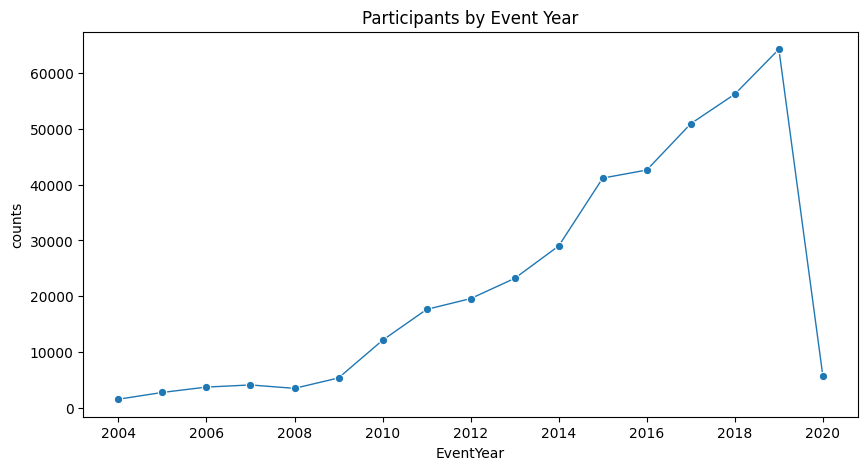

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,5))
sns.lineplot(data=df_events_cnt, x='EventYear', y='counts', linewidth=1, marker='o', markersize=6)
plt.title("Participants by Event Year")

Media de los tiempos de correr y bici por temperatura

In [20]:
df_merged['Air Temperature (°C)']

0         18
1         18
2         21
3         25
4         28
          ..
383497    22
383498    27
383499    25
383500    25
383501    27
Name: Air Temperature (°C), Length: 383502, dtype: int64

In [21]:
df_merged

,Gender,AgeGroup,AgeBand,Country,CountryISO2,EventYear,EventLocation,SwimTime,Transition1Time,BikeTime,...,FinishTime,Location,Swim Type,Bike Type,Run Type,Latitude,Longitude,Altitude (m),Air Temperature (°C),Water Temperature (°C)
0,M,35-39,35,Andorra,AD,2019,IRONMAN 70.3 Victoria,2042,159,10931,...,19655,"Victoria, British Columbia",Lake,Rolling,Flat,48.428318,-123.364953,23,18,19
1,M,35-39,35,Andorra,AD,2019,IRONMAN 70.3 Santa Cruz,1973,343,10197,...,19627,"Santa Cruz, California",Ocean,Rolling,Flat,37.050096,-121.990590,11,18,17
2,M,35-39,35,Andorra,AD,2016,IRONMAN 70.3 Texas,3133,445,11615,...,24580,"Galveston, Texas",Ocean,Flat,Rolling,29.387225,-94.992736,2,21,22
3,M,45-49,45,Andorra,AD,2016,IRONMAN 70.3 Mallorca,2115,265,10410,...,18700,"Alcúdia, Mallorca, Spain",Ocean,Hilly,Flat,39.852045,3.118386,10,25,17
4,F,35-39,35,Andorra,AD,2016,IRONMAN 70.3 Vichy,2457,252,9998,...,19462,"Vichy, France",Lake,Hilly,Flat,46.123927,3.420371,252,28,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383497,M,50-54,50,Zimbabwe,ZW,2019,IRONMAN 70.3 Chattanooga,1260,459,10045,...,20978,"Chattanooga, Tennessee",River,Rolling,Rolling,35.045722,-85.309488,210,22,22
383498,F,18-24,18,Zimbabwe,ZW,2014,IRONMAN 70.3 Boise,2056,218,11527,...,21020,"Boise, Idaho",Reservoir,Rolling,Flat,43.616616,-116.200886,820,27,22
383499,M,40-44,40,Zimbabwe,ZW,2014,IRONMAN 70.3 San Juan,2171,308,9504,...,20231,"San Juan, Argentina",Reservoir,Hilly,Flat,-30.705436,-69.198822,598,25,20
383500,M,25-29,25,Zimbabwe,ZW,2013,IRONMAN 70.3 San Juan,2218,311,10933,...,21014,"San Juan, Argentina",Reservoir,Hilly,Flat,-30.705436,-69.198822,598,25,20


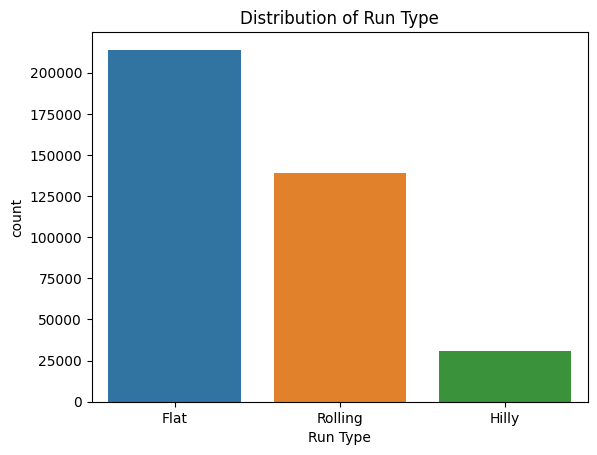

In [22]:
sns.countplot(data=df_merged, x='Run Type', hue='Run Type', palette='tab10')
plt.title("Distribution of Run Type")
plt.show()

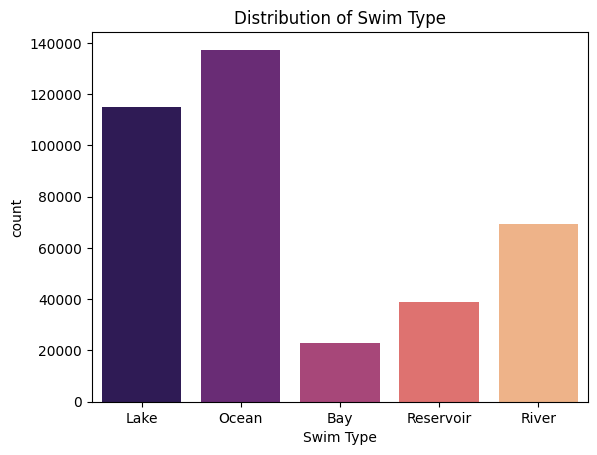

In [23]:
sns.countplot(data=df_merged, x='Swim Type', hue='Swim Type', palette='magma')
plt.title("Distribution of Swim Type")
plt.show()

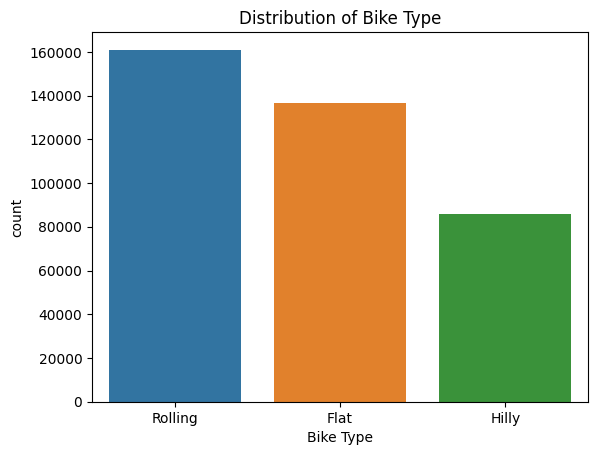

In [24]:
sns.countplot(data=df_merged, x='Bike Type', hue='Bike Type', palette='tab10') # same colors than Run 
plt.title("Distribution of Bike Type")
plt.show()

In [25]:
df_merged.describe([.75, .90, .95, .99])

,AgeBand,EventYear,SwimTime,Transition1Time,BikeTime,Transition2Time,RunTime,FinishTime,Latitude,Longitude,Altitude (m),Air Temperature (°C),Water Temperature (°C)
count,383502.000000,383502.000000,383502.000000,383502.000000,383502.000000,383502.000000,383502.000000,383502.000000,383502.000000,383502.000000,383502.000000,383502.000000,383502.000000
mean,37.224293,2015.427395,2348.000480,284.843372,10637.096049,222.405484,7766.027025,21258.393612,23.059656,-36.775215,198.246961,24.279195,21.890955
std,10.761898,3.284632,500.123888,97.065805,1342.694829,93.490511,1617.200254,3065.330908,27.219888,87.115180,360.802729,3.621083,3.406773
min,0.000000,2004.000000,1201.000000,46.000000,6511.000000,46.000000,4002.000000,13035.000000,-39.273222,-155.824722,1.000000,15.000000,14.000000
50%,35.000000,2016.000000,2293.000000,278.000000,10479.000000,208.000000,7528.000000,20979.000000,33.470971,-79.217000,25.000000,25.000000,22.000000
75%,45.000000,2018.000000,2624.000000,356.000000,11422.000000,281.000000,8742.000000,23190.000000,41.295156,8.822265,252.000000,27.000000,24.000000
90%,50.000000,2019.000000,2984.000000,423.000000,12424.000000,356.000000,10011.000000,25390.000000,47.674299,137.265556,598.000000,28.000000,26.000000
95%,55.000000,2019.000000,3242.000000,456.000000,13097.000000,403.000000,10809.000000,26816.000000,49.734987,152.910352,1048.000000,30.000000,28.000000
99%,60.000000,2020.000000,3855.000000,490.000000,14456.000000,469.000000,12251.990000,29329.000000,54.523330,176.069477,1624.000000,33.000000,29.000000
max,85.000000,2020.000000,5996.000000,499.000000,17979.000000,499.000000,14984.000000,36529.000000,59.437216,176.069477,1624.000000,33.000000,30.000000


c:\Users\emartin4\Videos\MIDA\venv-mida\Lib\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


<Axes: xlabel='RunTime'>

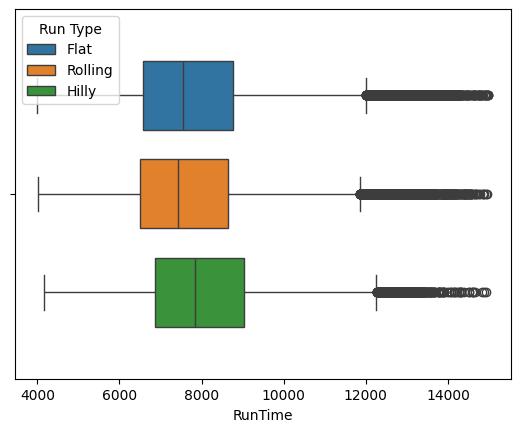

In [26]:
sns.boxplot(data=df_merged, x='RunTime', hue='Run Type', orient='v',  gap=0.3)

<Axes: xlabel='RunTime', ylabel='Count'>

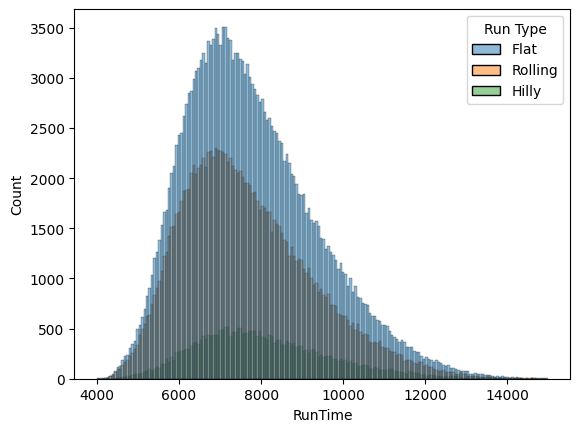

In [27]:
sns.histplot(data=df_merged, x='RunTime', hue='Run Type')

In [28]:
df_merged.groupby('Run Type')['RunTime'].agg('mean').reset_index()

,Run Type,RunTime
0,Flat,7779.976820
1,Hilly,8049.906315
2,Rolling,7682.087244


c:\Users\emartin4\Videos\MIDA\venv-mida\Lib\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


<Axes: xlabel='SwimTime'>

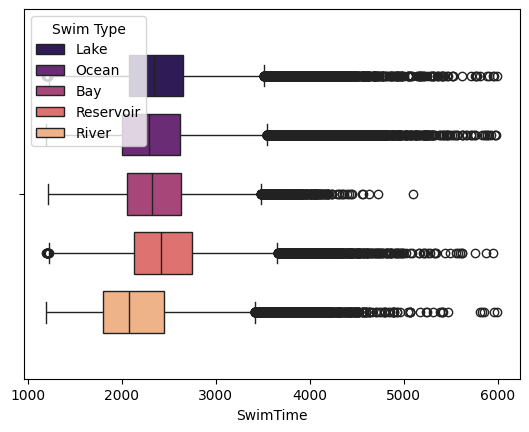

In [29]:
sns.boxplot(data=df_merged, x='SwimTime', hue='Swim Type', orient='v',  gap=0.3, palette='magma')

<Axes: xlabel='SwimTime', ylabel='Count'>

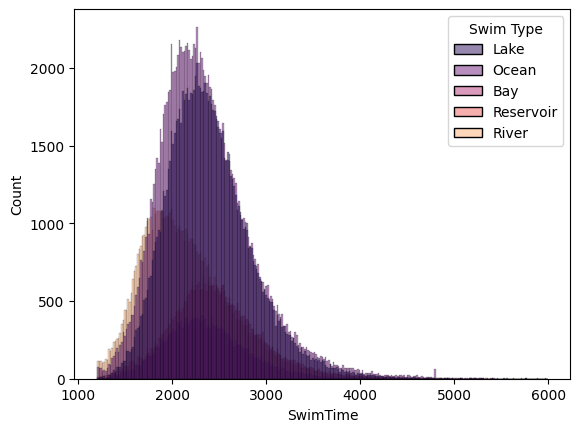

In [30]:
sns.histplot(data=df_merged, x='SwimTime', hue='Swim Type', palette='magma', alpha=0.5)

In [31]:
df_merged.groupby('Swim Type')['SwimTime'].agg('mean').reset_index()

,Swim Type,SwimTime
0,Bay,2368.902911
1,Lake,2402.863767
2,Ocean,2357.233408
3,Reservoir,2465.015734
4,River,2166.025400


<Axes: xlabel='BikeTime', ylabel='Count'>

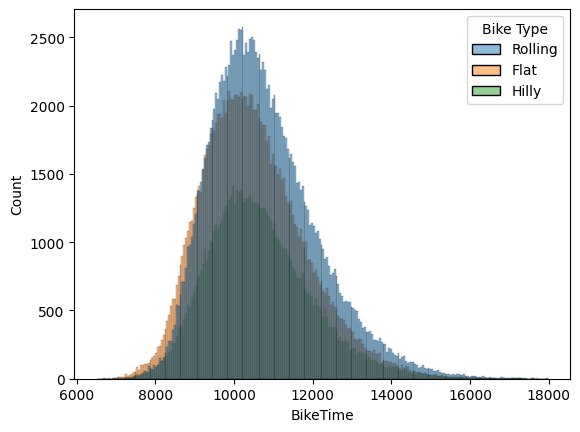

In [32]:
sns.histplot(data=df_merged, x='BikeTime', hue='Bike Type', palette='tab10')

In [33]:
df_merged.groupby('Bike Type')['BikeTime'].agg('mean').reset_index()

,Bike Type,BikeTime
0,Flat,10497.462680
1,Hilly,10643.424580
2,Rolling,10752.307546


In [34]:
df_merged

,Gender,AgeGroup,AgeBand,Country,CountryISO2,EventYear,EventLocation,SwimTime,Transition1Time,BikeTime,...,FinishTime,Location,Swim Type,Bike Type,Run Type,Latitude,Longitude,Altitude (m),Air Temperature (°C),Water Temperature (°C)
0,M,35-39,35,Andorra,AD,2019,IRONMAN 70.3 Victoria,2042,159,10931,...,19655,"Victoria, British Columbia",Lake,Rolling,Flat,48.428318,-123.364953,23,18,19
1,M,35-39,35,Andorra,AD,2019,IRONMAN 70.3 Santa Cruz,1973,343,10197,...,19627,"Santa Cruz, California",Ocean,Rolling,Flat,37.050096,-121.990590,11,18,17
2,M,35-39,35,Andorra,AD,2016,IRONMAN 70.3 Texas,3133,445,11615,...,24580,"Galveston, Texas",Ocean,Flat,Rolling,29.387225,-94.992736,2,21,22
3,M,45-49,45,Andorra,AD,2016,IRONMAN 70.3 Mallorca,2115,265,10410,...,18700,"Alcúdia, Mallorca, Spain",Ocean,Hilly,Flat,39.852045,3.118386,10,25,17
4,F,35-39,35,Andorra,AD,2016,IRONMAN 70.3 Vichy,2457,252,9998,...,19462,"Vichy, France",Lake,Hilly,Flat,46.123927,3.420371,252,28,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383497,M,50-54,50,Zimbabwe,ZW,2019,IRONMAN 70.3 Chattanooga,1260,459,10045,...,20978,"Chattanooga, Tennessee",River,Rolling,Rolling,35.045722,-85.309488,210,22,22
383498,F,18-24,18,Zimbabwe,ZW,2014,IRONMAN 70.3 Boise,2056,218,11527,...,21020,"Boise, Idaho",Reservoir,Rolling,Flat,43.616616,-116.200886,820,27,22
383499,M,40-44,40,Zimbabwe,ZW,2014,IRONMAN 70.3 San Juan,2171,308,9504,...,20231,"San Juan, Argentina",Reservoir,Hilly,Flat,-30.705436,-69.198822,598,25,20
383500,M,25-29,25,Zimbabwe,ZW,2013,IRONMAN 70.3 San Juan,2218,311,10933,...,21014,"San Juan, Argentina",Reservoir,Hilly,Flat,-30.705436,-69.198822,598,25,20


In [35]:
df_merged.columns

Index(['Gender', 'AgeGroup', 'AgeBand', 'Country', 'CountryISO2', 'EventYear',
       'EventLocation', 'SwimTime', 'Transition1Time', 'BikeTime',
       'Transition2Time', 'RunTime', 'FinishTime', 'Location', 'Swim Type',
       'Bike Type', 'Run Type', 'Latitude', 'Longitude', 'Altitude (m)',
       'Air Temperature (°C)', 'Water Temperature (°C)'],
      dtype='object')

In [36]:
df_merged[df_merged.Latitude.isnull()].Location.unique()

array([], dtype=object)

### Map

In [37]:
# Function to assign a color based on the temperature
def get_color(temperature):
    if temperature <= 18.0:
        return 'blue'
    elif 18.0 < temperature <= 21.0:
        return 'lightblue'
    elif 21.0 < temperature <= 24.0:
        return 'beige'
    elif 24.0 < temperature <= 27.0:
        return 'orange'
    elif 27.0 < temperature <= 30.0:
        return 'red'
    else:
        return 'darkred'  # for temperatures above 30

In [38]:
df_merged.Latitude

0         48.428318
1         37.050096
2         29.387225
3         39.852045
4         46.123927
            ...    
383497    35.045722
383498    43.616616
383499   -30.705436
383500   -30.705436
383501    38.571462
Name: Latitude, Length: 383502, dtype: float64

In [39]:
import folium
import pandas as pd
from branca.colormap import linear

# Create a map centered around the average latitude and longitude
map_center = [df_merged['Latitude'].loc[0], df_merged['Longitude'].loc[0]]
mymap = folium.Map(location=map_center, zoom_start=4)

# Add markers for each location in the DataFrame
for key, grp in df_merged.dropna().groupby('Location'):
    air_temperature = grp['Air Temperature (°C)'].iloc[0]
    color = get_color(air_temperature)
    
    folium.Marker(
        location=[grp['Latitude'].iloc[0], grp['Longitude'].iloc[0]],
        popup=f"Location: {key}<br>EventLocation: {grp['EventLocation'].iloc[0]}<br>Participants: {len(grp)}<br>Air Temperature (°C): {grp['Air Temperature (°C)'].iloc[0]}<br>Water Temperature (°C): {grp['Water Temperature (°C)'].iloc[0]}",
        icon=folium.Icon(icon='fa-sun', color=color)  # Set marker color based on temperature,
    ).add_to(mymap)


# Save the map to an HTML file
# mymap.save("map_air_temp.html")
mymap



### Barplots, num corr

C:\Users\emartin4\AppData\Local\Temp\ipykernel_11712\2781675872.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_counts.index, y=gender_counts.values, palette='viridis')


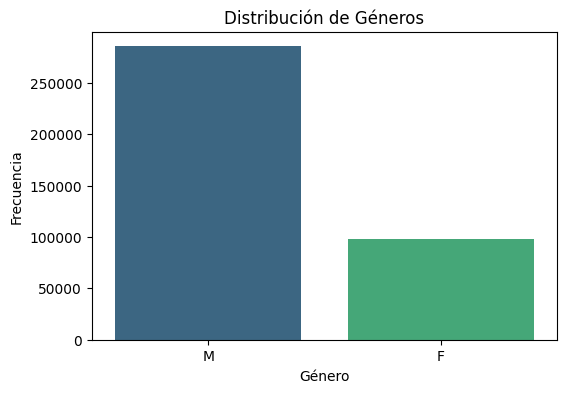

C:\Users\emartin4\AppData\Local\Temp\ipykernel_11712\2781675872.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=agegroup_counts.index, y=agegroup_counts.values, palette='magma')


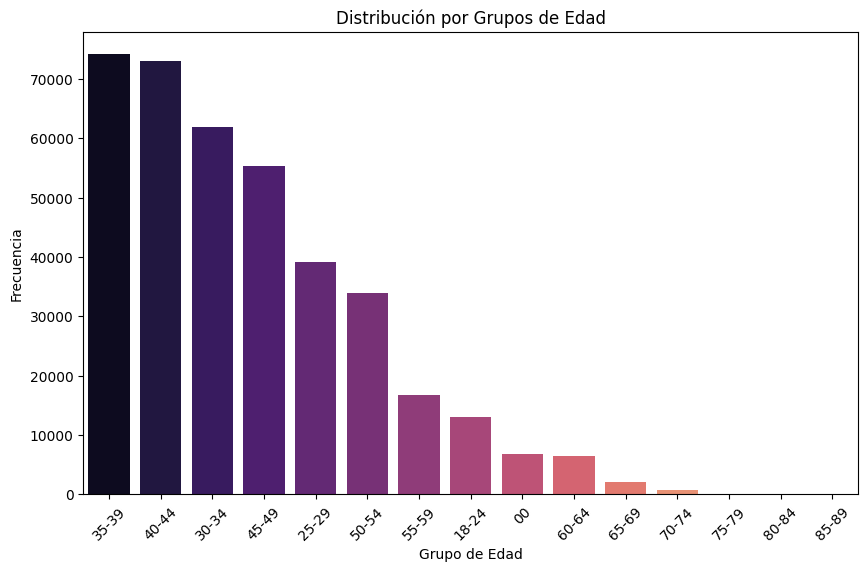

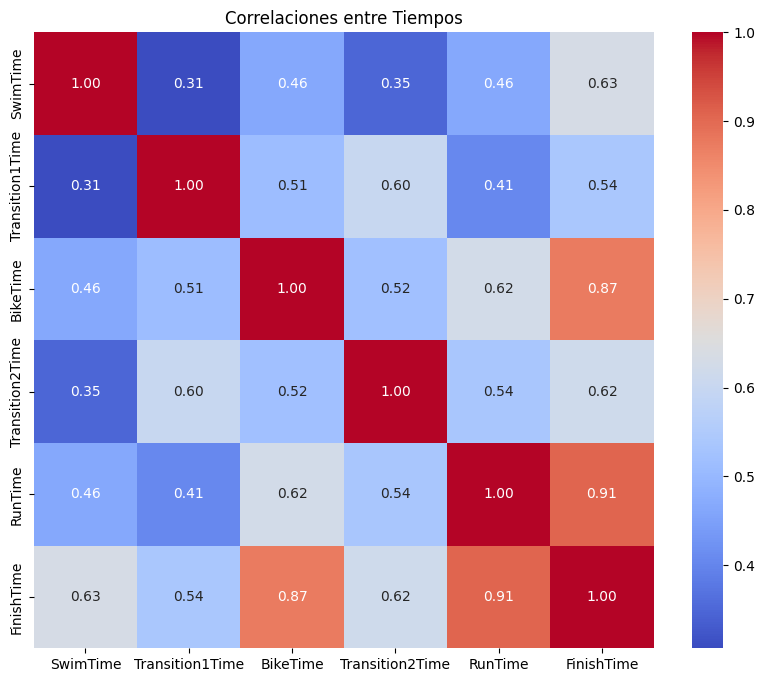

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Correlación entre tiempos
correlations = df_merged[['SwimTime', 'Transition1Time', 'BikeTime', 'Transition2Time', 'RunTime', 'FinishTime']].corr()

# Distribución de géneros
gender_counts = df_merged['Gender'].value_counts()

# Distribución de grupos de edad
agegroup_counts = df_merged['AgeGroup'].value_counts()

# Visualización 1: Distribución de géneros
plt.figure(figsize=(6, 4))
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette='viridis')
plt.title('Distribución de Géneros')
plt.xlabel('Género')
plt.ylabel('Frecuencia')
plt.show()

# Visualización 2: Grupos de Edad
plt.figure(figsize=(10, 6))
sns.barplot(x=agegroup_counts.index, y=agegroup_counts.values, palette='magma')
plt.title('Distribución por Grupos de Edad')
plt.xlabel('Grupo de Edad')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()

# Visualización 3: Heatmap de Correlaciones
plt.figure(figsize=(10, 8))
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlaciones entre Tiempos')
plt.show()


### Boxplot

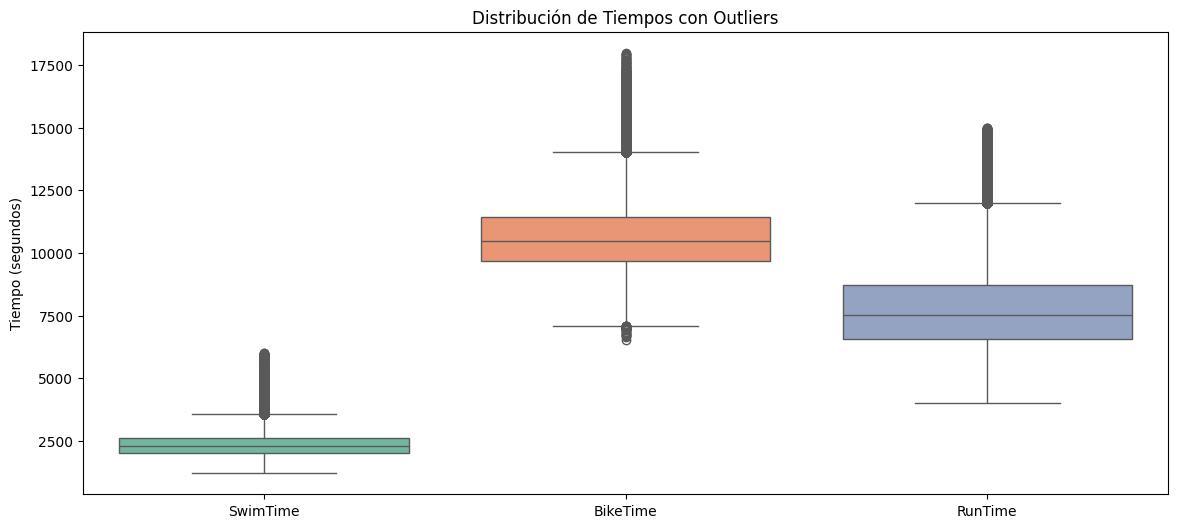

{'SwimTime': 8397, 'BikeTime': 6698, 'RunTime': 5311}

In [41]:
# Detectar outliers en tiempos usando el rango intercuartílico (IQR)
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df_merged[(df_merged[column] < lower_bound) | (df_merged[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

outliers_swim, lb_swim, ub_swim = detect_outliers(df_merged, 'SwimTime')
outliers_bike, lb_bike, ub_bike = detect_outliers(df_merged, 'BikeTime')
outliers_run, lb_run, ub_run = detect_outliers(df_merged, 'RunTime')

# Contar outliers en cada tiempo
outliers_counts = {
    "SwimTime": len(outliers_swim),
    "BikeTime": len(outliers_bike),
    "RunTime": len(outliers_run)
}

# Visualización de tiempos con y sin outliers
plt.figure(figsize=(14, 6))
sns.boxplot(data=df_merged[['SwimTime', 'BikeTime', 'RunTime']], palette='Set2')
plt.title('Distribución de Tiempos con Outliers')
plt.ylabel('Tiempo (segundos)')
plt.show()

outliers_counts

In [42]:
cities = sorted(df_merged.Location.unique())
cities

['Alcúdia, Mallorca, Spain',
 'Augusta, Georgia',
 'Augusta, Maine',
 'Bahrain, Middle East',
 'Boise, Idaho',
 'Boulder, Colorado',
 'Brasilia, Brazil',
 'Buenos Aires, Argentina',
 'Cairns, Queensland',
 'Calgary, Alberta',
 'Cambridge, Maryland',
 'Campeche, Mexico',
 'Cartagena, Colombia',
 'Chattanooga, Tennessee',
 "Coeur d'Alene, Idaho",
 'Cozumel, Mexico',
 'Da Nang, Viet Nam',
 'Davao City, Philippines',
 'Dorset, England',
 'Florianopolis, Brazil',
 'Fortaleza, Brazil',
 'Galveston, Texas',
 'Gdynia, Poland',
 'Geelong, Victoria',
 'Goseong, Korea',
 'Haines City, Florida',
 'Huntsville, Ontario',
 'India',
 'Indian Wells, California',
 'Kohala Coast, Hawaii',
 'Kraichgau, Baden-Württemberg, Germany',
 'Kwa Zulu Natal',
 'Langkawi, Malaysia',
 'Lima, Perú',
 'Los Cabos, Mexico',
 'Madison, Wisconsin',
 'Manta, Manabi',
 'Marbella, Spain',
 'Monterrey, Mexico',
 'Mooloolaba, Queensland',
 'Muncie, Indiana',
 'Muscat, Oman',
 'Nice, France',
 'Oceanside, California',
 'Panama C

In [43]:
# Mapeo de ciudades sin país directo a su país correspondiente
city_to_country = {
    'Augusta, Georgia': 'United States',
    'Augusta, Maine': 'United States',
    'Cambridge, Maryland': 'United States',
    'Brasilia, Brazil': 'Brazil',
    'Buenos Aires, Argentina': 'Argentina',
    'Cairns, Queensland': 'Australia',
    'Calgary, Alberta': 'Canada',
    'Campeche, Mexico': 'Mexico',
    'Cartagena, Colombia': 'Colombia',
    'Chattanooga, Tennessee': 'United States',
    'Coeur d\'Alene, Idaho': 'United States',
    'Cozumel, Mexico': 'Mexico',
    'Da Nang, Viet Nam': 'Vietnam',
    'Davao City, Philippines': 'Philippines',
    'Dorset, England': 'United Kingdom',
    'Florianopolis, Brazil': 'Brazil',
    'Fortaleza, Brazil': 'Brazil',
    'Galveston, Texas': 'United States',
    'Gdynia, Poland': 'Poland',
    'Geelong, Victoria': 'Australia',
    'Goseong, Korea': 'South Korea',
    'Haines City, Florida': 'United States',
    'Huntsville, Ontario': 'Canada',
    'India': 'India',
    'Indian Wells, California': 'United States',
    'Kohala Coast, Hawaii': 'United States',
    'Kraichgau, Baden-Württemberg, Germany': 'Germany',
    'Kwa Zulu Natal': 'South Africa',
    'Langkawi, Malaysia': 'Malaysia',
    'Lima, Perú': 'Peru',
    'Los Cabos, Mexico': 'Mexico',
    'Madison, Wisconsin': 'United States',
    'Manta, Manabi': 'Ecuador',
    'Marbella, Spain': 'Spain',
    'Monterrey, Mexico': 'Mexico',
    'Mooloolaba, Queensland': 'Australia',
    'Muncie, Indiana': 'United States',
    'Muscat, Oman': 'Oman',
    'Nice, France': 'France',
    'Oceanside, California': 'United States',
    'Panama City Beach, Florida': 'United States',
    'Panamá City, Panamá': 'Panama',
    'Penrith, New South Wales': 'Australia',
    'Port Macquarie, New South Wales': 'Australia',
    'Pucon, Chile': 'Chile',
    'Punta del Este, Uruguay': 'Uruguay',
    'Rapperswil-Jona, Switzerland': 'Switzerland',
    'Region Moselle, Luxembourg': 'Luxembourg',
    'Rio de Janeiro, Brazil': 'Brazil',
    'San Juan, Argentina': 'Argentina',
    'San Juan, Puerto Rico, United States Territory': 'United States',
    'Sandusky, Ohio': 'United States',
    'Santa Cruz, California': 'United States',
    'Sao Paulo, Brazil': 'Brazil',
    'Subic Bay, Philippines': 'Philippines',
    'Tahara City, Toyohashi City, Japan': 'Japan',
    'Tahara City, Toyohashi City, Japan&nbsp;': 'Japan',
    'Tallinn, Estonia': 'Estonia',
    'Taupo, New Zealand': 'New Zealand',
    'Taupo, Waikato': 'New Zealand',
    'Vichy, France': 'France',
    'Victoria, British Columbia': 'Canada',
    'Waco, Texas': 'United States',
    'Wilmington, North Carolina': 'United States',
    'Zell am See, Austria': 'Austria',
    'Boise, Idaho': 'United States',  # Corrected
    'Boulder, Colorado': 'United States'  # Added to fix
}
# Función para extraer el país de una ciudad
def extract_country(city):
    if city in city_to_country:
        return city_to_country[city]
    else:
        # If city is not in the mapping, attempt to extract from last part (after the last comma)
        return city.split(',')[-1].strip()


# Apply the extract_country function to get the countries for each city
df_merged['EventCountry'] = df_merged['Location'].apply(extract_country)
df_merged

,Gender,AgeGroup,AgeBand,Country,CountryISO2,EventYear,EventLocation,SwimTime,Transition1Time,BikeTime,...,Location,Swim Type,Bike Type,Run Type,Latitude,Longitude,Altitude (m),Air Temperature (°C),Water Temperature (°C),EventCountry
0,M,35-39,35,Andorra,AD,2019,IRONMAN 70.3 Victoria,2042,159,10931,...,"Victoria, British Columbia",Lake,Rolling,Flat,48.428318,-123.364953,23,18,19,Canada
1,M,35-39,35,Andorra,AD,2019,IRONMAN 70.3 Santa Cruz,1973,343,10197,...,"Santa Cruz, California",Ocean,Rolling,Flat,37.050096,-121.990590,11,18,17,United States
2,M,35-39,35,Andorra,AD,2016,IRONMAN 70.3 Texas,3133,445,11615,...,"Galveston, Texas",Ocean,Flat,Rolling,29.387225,-94.992736,2,21,22,United States
3,M,45-49,45,Andorra,AD,2016,IRONMAN 70.3 Mallorca,2115,265,10410,...,"Alcúdia, Mallorca, Spain",Ocean,Hilly,Flat,39.852045,3.118386,10,25,17,Spain
4,F,35-39,35,Andorra,AD,2016,IRONMAN 70.3 Vichy,2457,252,9998,...,"Vichy, France",Lake,Hilly,Flat,46.123927,3.420371,252,28,25,France
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383497,M,50-54,50,Zimbabwe,ZW,2019,IRONMAN 70.3 Chattanooga,1260,459,10045,...,"Chattanooga, Tennessee",River,Rolling,Rolling,35.045722,-85.309488,210,22,22,United States
383498,F,18-24,18,Zimbabwe,ZW,2014,IRONMAN 70.3 Boise,2056,218,11527,...,"Boise, Idaho",Reservoir,Rolling,Flat,43.616616,-116.200886,820,27,22,United States
383499,M,40-44,40,Zimbabwe,ZW,2014,IRONMAN 70.3 San Juan,2171,308,9504,...,"San Juan, Argentina",Reservoir,Hilly,Flat,-30.705436,-69.198822,598,25,20,Argentina
383500,M,25-29,25,Zimbabwe,ZW,2013,IRONMAN 70.3 San Juan,2218,311,10933,...,"San Juan, Argentina",Reservoir,Hilly,Flat,-30.705436,-69.198822,598,25,20,Argentina


In [44]:
tmp = df_merged[['Location', 'EventCountry']].drop_duplicates()

In [45]:
df_events_cnt_country = df_merged.groupby(['EventLocation', 'EventCountry']).size().reset_index(name='Counts').sort_values(by='Counts', ascending=False)
df_events_cnt_country

,EventLocation,EventCountry,Counts
0,IRONMAN 70.3 Augusta,United States,23803
16,IRONMAN 70.3 Florida,United States,22576
58,IRONMAN 70.3 Texas,United States,17168
13,IRONMAN 70.3 Eagleman,United States,16618
31,IRONMAN 70.3 Mallorca,Spain,16307
...,...,...,...
62,IRONMAN 70.3 Waco,United States,868
50,IRONMAN 70.3 San Juan / Puerto Rico,United States,778
53,IRONMAN 70.3 Subic Bay,Philippines,465
56,IRONMAN 70.3 Tallinn,Estonia,452


<Figure size 1000x200 with 0 Axes>

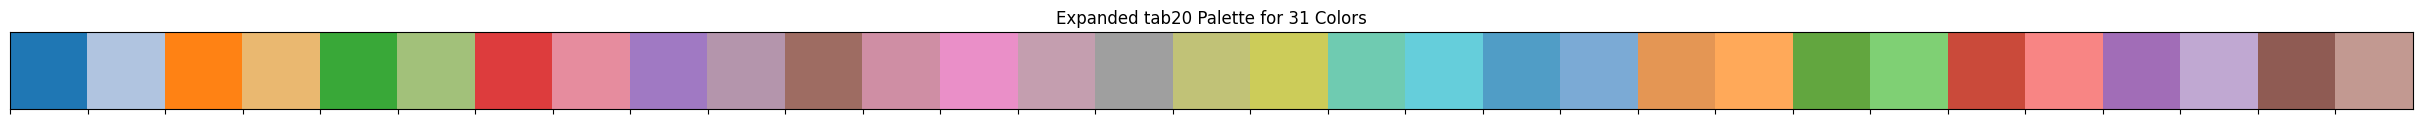

In [46]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Load the original tab20 palette
tab20 = plt.cm.tab20.colors

# Interpolate the tab20 palette to get 31 colors
expanded_palette = [tuple(np.array(tab20[i % 20]) * (1 - i/31) + np.array(tab20[(i + 1) % 20]) * (i/31)) for i in range(31)]

# Plot the expanded palette
plt.figure(figsize=(10, 2))
sns.palplot(expanded_palette)
plt.title("Expanded tab20 Palette for 31 Colors")
plt.show()


Text(0.5, 1.0, 'Participants by EventLocation')

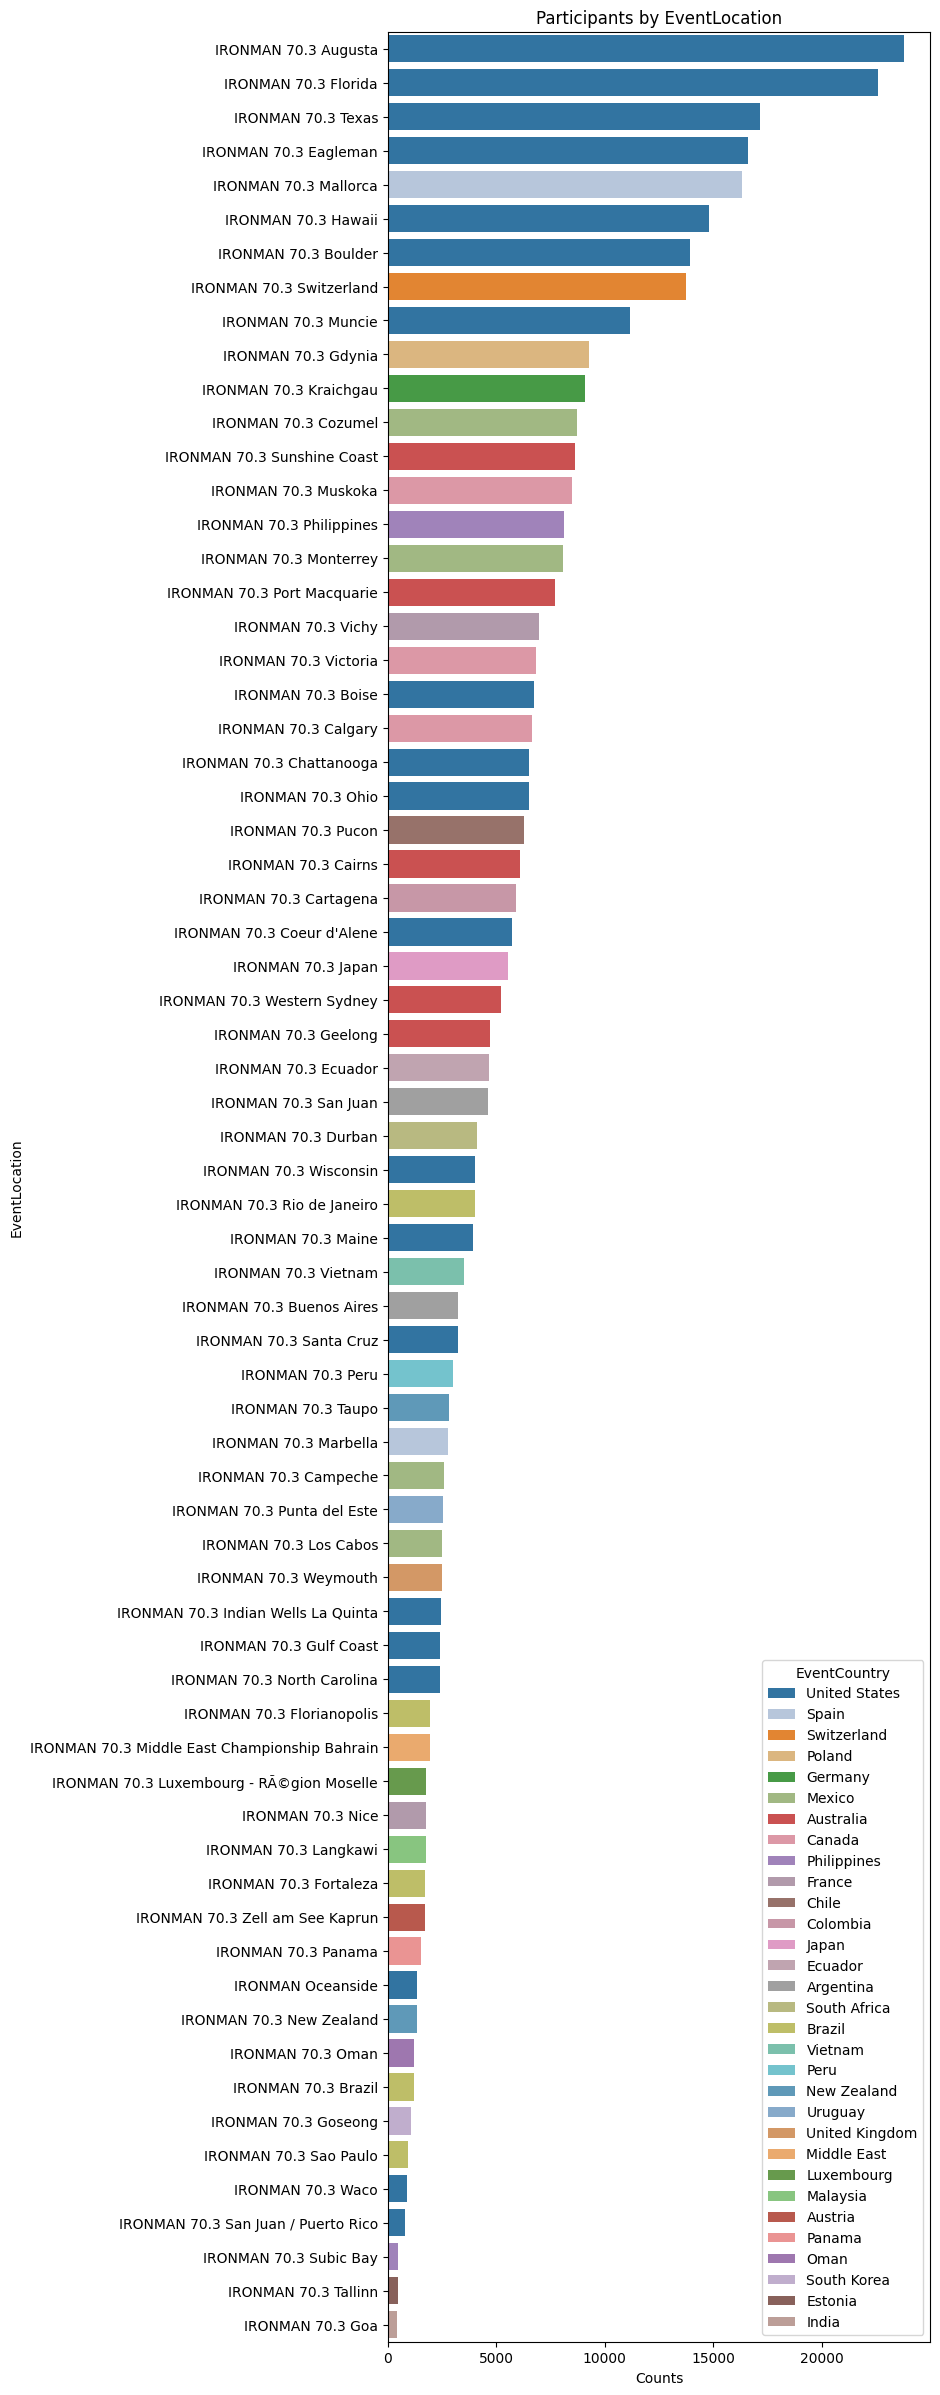

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(7,30))
sns.barplot(data=df_events_cnt_country, x='Counts', y='EventLocation', hue='EventCountry', orient='h', palette=expanded_palette)
plt.title("Participants by EventLocation")

In [48]:
df_events_cnt_year = df_merged.groupby(['EventYear', 'EventLocation']).size().reset_index(name='CountsYear').sort_values(by=['EventYear', 'EventLocation'], ascending=True)
df_events_cnt_year

,EventYear,EventLocation,CountsYear
0,2004,IRONMAN 70.3 Florida,1572
1,2005,IRONMAN 70.3 Florida,1441
2,2005,IRONMAN Oceanside,1347
3,2006,IRONMAN 70.3 Eagleman,1231
4,2006,IRONMAN 70.3 Florida,1750
...,...,...,...
331,2020,IRONMAN 70.3 Gulf Coast,157
332,2020,IRONMAN 70.3 New Zealand,658
333,2020,IRONMAN 70.3 Oman,606
334,2020,IRONMAN 70.3 Sunshine Coast,697


### Pivot Tables and Barh Plots (Country and EventLocation)

In [49]:
df_events_cnt_year['EventYear'] = df_events_cnt_year['EventYear'].astype(int)

In [50]:
df_events_cnt_year = df_events_cnt_year.merge(df_events_cnt_country).sort_values(['Counts','EventLocation'], ascending=False)
df_events_cnt_year.head(40)

,EventYear,EventLocation,CountsYear,EventCountry,Counts
12,2009,IRONMAN 70.3 Augusta,2364,United States,23803
16,2010,IRONMAN 70.3 Augusta,2285,United States,23803
26,2011,IRONMAN 70.3 Augusta,2407,United States,23803
40,2012,IRONMAN 70.3 Augusta,2448,United States,23803
57,2013,IRONMAN 70.3 Augusta,2235,United States,23803
75,2014,IRONMAN 70.3 Augusta,2087,United States,23803
99,2015,IRONMAN 70.3 Augusta,2086,United States,23803
133,2016,IRONMAN 70.3 Augusta,1805,United States,23803
172,2017,IRONMAN 70.3 Augusta,1921,United States,23803
219,2018,IRONMAN 70.3 Augusta,2140,United States,23803


In [51]:
df_events_cnt_year[df_events_cnt_year['EventLocation'] == 'IRONMAN 70.3 Augusta']

,EventYear,EventLocation,CountsYear,EventCountry,Counts
12,2009,IRONMAN 70.3 Augusta,2364,United States,23803
16,2010,IRONMAN 70.3 Augusta,2285,United States,23803
26,2011,IRONMAN 70.3 Augusta,2407,United States,23803
40,2012,IRONMAN 70.3 Augusta,2448,United States,23803
57,2013,IRONMAN 70.3 Augusta,2235,United States,23803
75,2014,IRONMAN 70.3 Augusta,2087,United States,23803
99,2015,IRONMAN 70.3 Augusta,2086,United States,23803
133,2016,IRONMAN 70.3 Augusta,1805,United States,23803
172,2017,IRONMAN 70.3 Augusta,1921,United States,23803
219,2018,IRONMAN 70.3 Augusta,2140,United States,23803


In [52]:
# Crear una tabla pivot para preparar los datos para el gráfico apilado
pivot_data = df_events_cnt_year.pivot_table(index='EventLocation',columns='EventYear',values='CountsYear',aggfunc='sum',fill_value=0)
pivot_data

EventYear,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
EventLocation,,,,,,,,,,,,,,,,,
IRONMAN 70.3 Augusta,0,0,0,0,0,2364,2285,2407,2448,2235,2087,2086,1805,1921,2140,2025,0
IRONMAN 70.3 Boise,0,0,0,0,797,1137,1058,1013,0,860,1054,810,0,0,0,0,0
IRONMAN 70.3 Boulder,0,0,0,0,0,0,1143,1255,1241,1413,1312,1462,1444,1736,1320,1606,0
IRONMAN 70.3 Brazil,0,0,0,0,0,0,0,0,0,0,412,793,0,0,0,0,0
IRONMAN 70.3 Buenos Aires,0,0,0,0,0,0,0,0,0,0,0,0,1499,1743,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
IRONMAN 70.3 Western Sydney,0,0,0,0,0,0,0,0,0,0,1158,1036,803,0,960,1263,0
IRONMAN 70.3 Weymouth,0,0,0,0,0,0,0,0,0,0,0,0,756,966,444,332,0
IRONMAN 70.3 Wisconsin,0,0,0,0,0,0,0,0,0,0,0,0,0,1519,1040,1480,0


In [53]:
pivot_data

EventYear,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
EventLocation,,,,,,,,,,,,,,,,,
IRONMAN 70.3 Augusta,0,0,0,0,0,2364,2285,2407,2448,2235,2087,2086,1805,1921,2140,2025,0
IRONMAN 70.3 Boise,0,0,0,0,797,1137,1058,1013,0,860,1054,810,0,0,0,0,0
IRONMAN 70.3 Boulder,0,0,0,0,0,0,1143,1255,1241,1413,1312,1462,1444,1736,1320,1606,0
IRONMAN 70.3 Brazil,0,0,0,0,0,0,0,0,0,0,412,793,0,0,0,0,0
IRONMAN 70.3 Buenos Aires,0,0,0,0,0,0,0,0,0,0,0,0,1499,1743,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
IRONMAN 70.3 Western Sydney,0,0,0,0,0,0,0,0,0,0,1158,1036,803,0,960,1263,0
IRONMAN 70.3 Weymouth,0,0,0,0,0,0,0,0,0,0,0,0,756,966,444,332,0
IRONMAN 70.3 Wisconsin,0,0,0,0,0,0,0,0,0,0,0,0,0,1519,1040,1480,0


<Figure size 1000x2000 with 0 Axes>

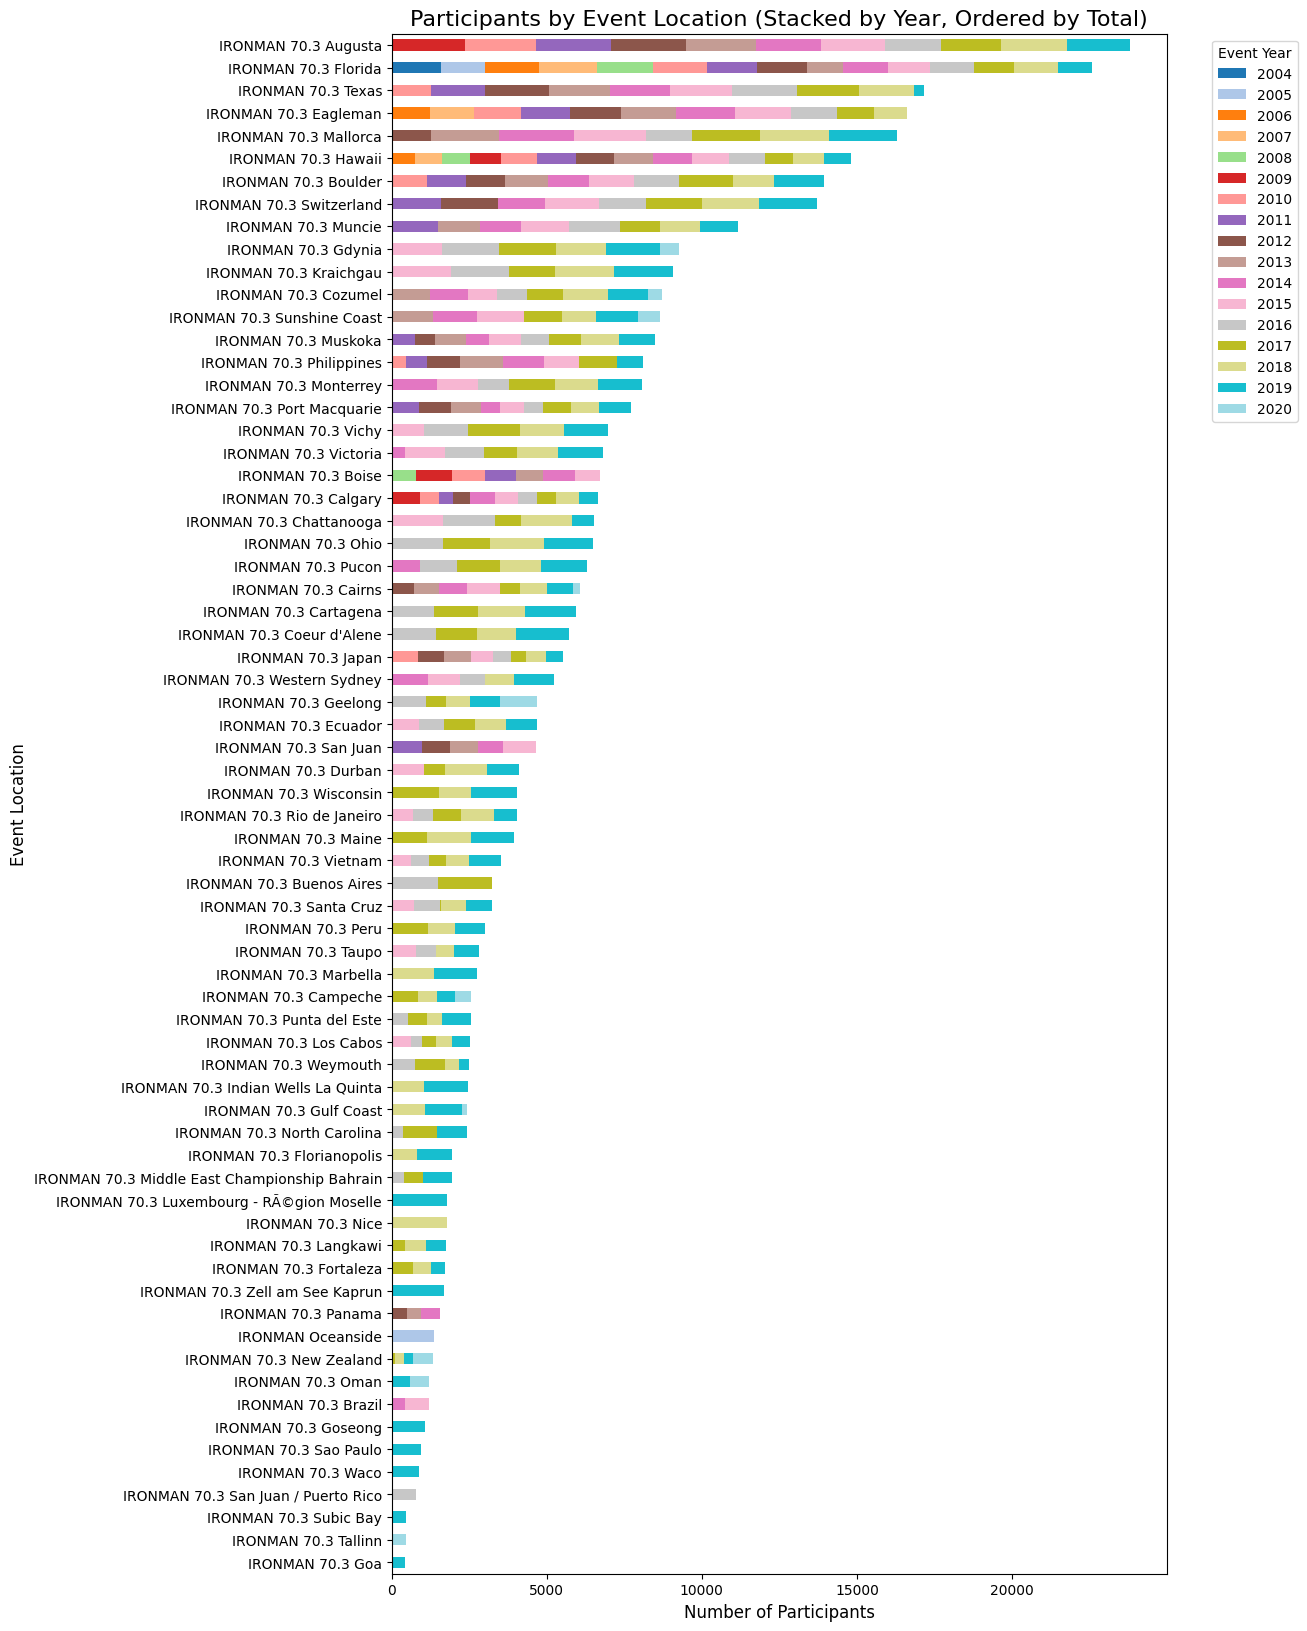

In [54]:
# Calcular el total por ubicación y ordenar de mayor a menor
pivot_data['TotalCounts'] = pivot_data.sum(axis=1)  # Sumar las columnas (años) para cada ubicación
pivot_data = pivot_data.sort_values('TotalCounts', ascending=True).drop(columns='TotalCounts')  # Ordenar y quitar columna auxiliar
# Crear el gráfico apilado
plt.figure(figsize=(10, 20))
pivot_data.plot(
    kind='barh',  # Gráfico de barras horizontales
    stacked=True,  # Apilar las barras
    figsize=(10, 20),
    colormap='tab20'  # Paleta de colores
)
# Personalización del gráfico
plt.title("Participants by Event Location (Stacked by Year, Ordered by Total)", fontsize=16)
plt.xlabel("Number of Participants", fontsize=12)
plt.ylabel("Event Location", fontsize=12)
plt.legend(title="Event Year", bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.tight_layout()  # Ajustar diseño
plt.show()

<Figure size 1000x2000 with 0 Axes>

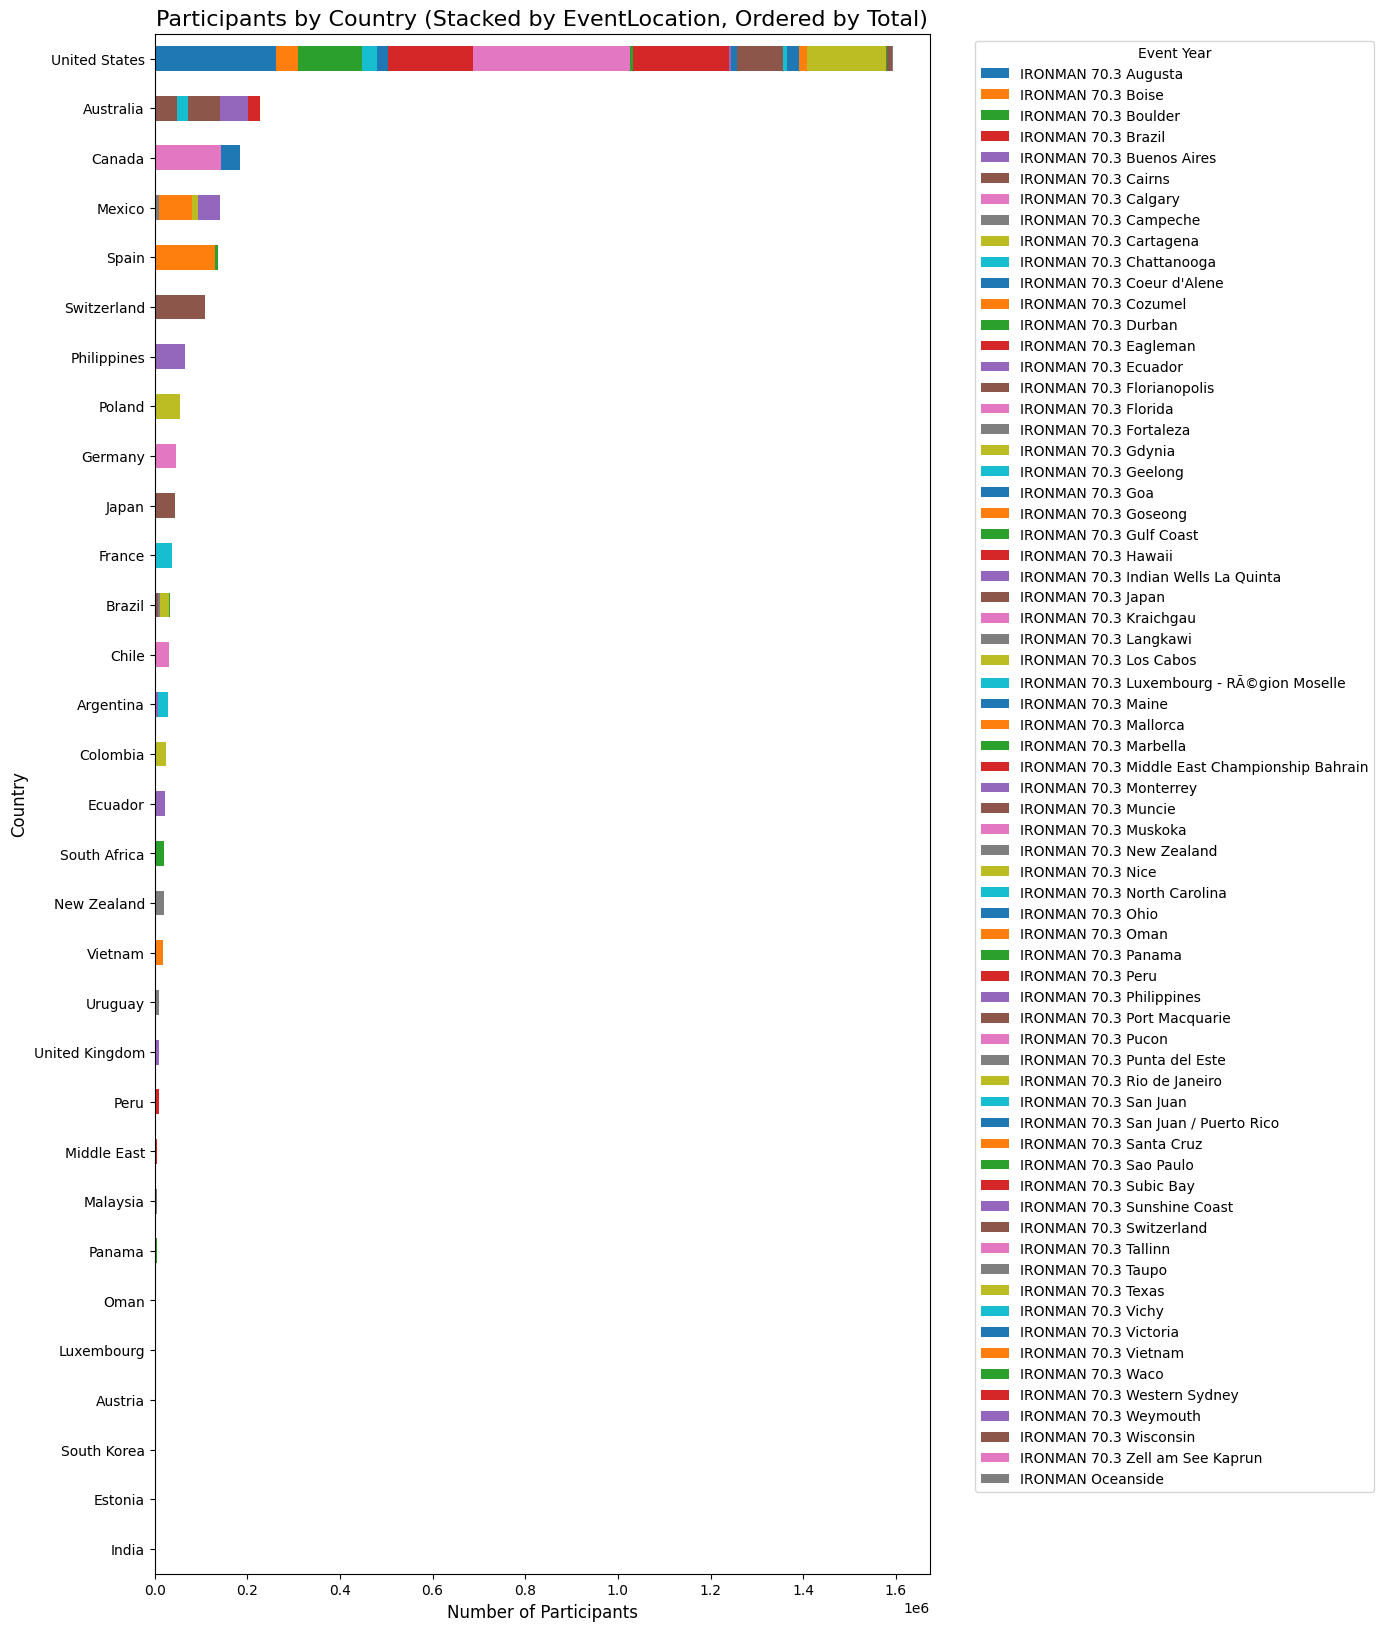

In [55]:
# Crear una tabla pivot para preparar los datos para el gráfico apilado
pivot_data_country = df_events_cnt_year.pivot_table(index='EventCountry',columns='EventLocation',values='Counts',aggfunc='sum',fill_value=0)

# Calcular el total por ubicación y ordenar de mayor a menor
pivot_data_country['TotalCounts'] = pivot_data_country.sum(axis=1)  # Sumar las columnas (años) para cada ubicación
pivot_data_country = pivot_data_country.sort_values('TotalCounts', ascending=True).drop(columns='TotalCounts')  # Ordenar y quitar columna auxiliar
# Crear el gráfico apilado
plt.figure(figsize=(10, 20))
pivot_data_country.plot(
    kind='barh',  # Gráfico de barras horizontales
    stacked=True,  # Apilar las barras
    figsize=(10, 20),
    # colormap='tab20'  # Paleta de colores
)
# Personalización del gráfico
plt.title("Participants by Country (Stacked by EventLocation, Ordered by Total)", fontsize=16)
plt.xlabel("Number of Participants", fontsize=12)
plt.ylabel("Country", fontsize=12)
plt.legend(title="Event Year", bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.tight_layout()  # Ajustar diseño
plt.show()

### Boxplots by Nationalities

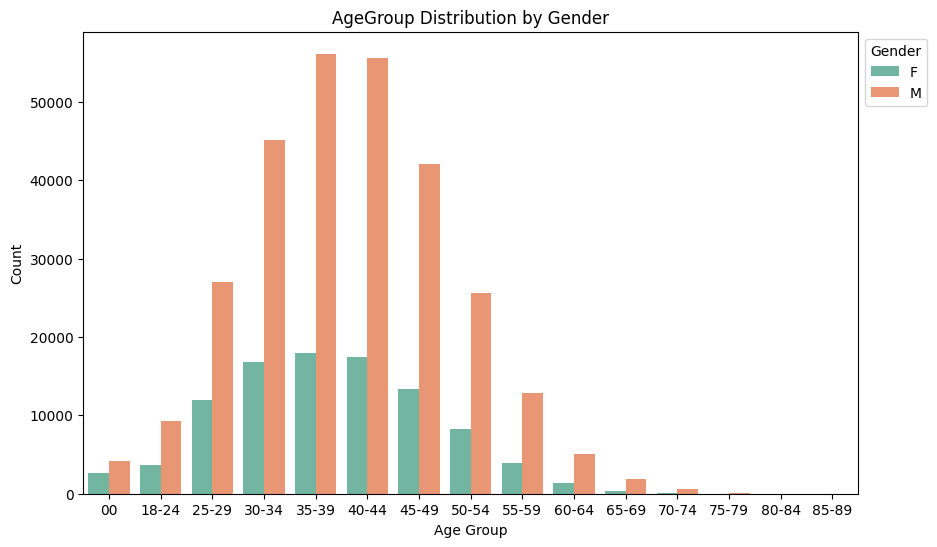

In [56]:
# Crear un countplot para la distribución de AgeBand por Gender y Country
plt.figure(figsize=(10, 6))
sns.countplot(x='AgeGroup', hue='Gender', data=df_merged.sort_values('AgeGroup'), palette='Set2', dodge=True)

# Personalizar el gráfico
plt.title("AgeGroup Distribution by Gender")
plt.xlabel("Age Group")
plt.ylabel("Count")

# Mostrar la leyenda correctamente
plt.legend(title="Gender", loc='upper left', bbox_to_anchor=(1, 1))

# Mostrar el gráfico
plt.show()

Text(0.5, 1.0, 'TOP 20 Nationalities')

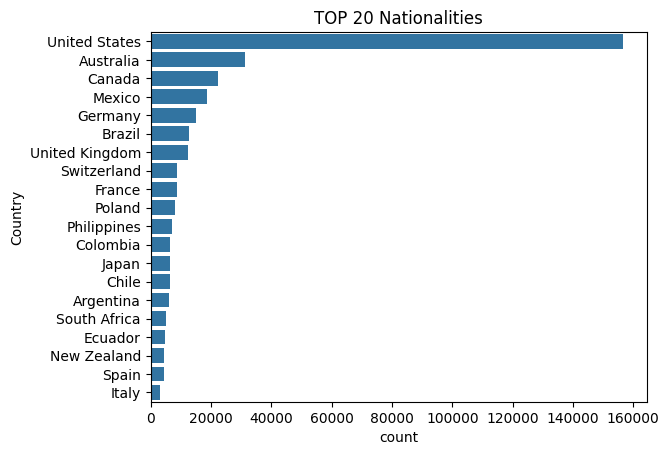

In [57]:
# plt.figure(figsize=(7, 35))
df_nationalities_cnt = df_merged.Country.value_counts().reset_index()
sns.barplot(data=df_nationalities_cnt.head(20), x='count', y='Country', orient='h')
plt.title('TOP 20 Nationalities')

# Categorical Variables (Label Encoder, One Hot Encoder)

In [58]:
random_state = 42

In [59]:
df_encoded = df_merged.copy()

In [60]:
df_encoded.columns

Index(['Gender', 'AgeGroup', 'AgeBand', 'Country', 'CountryISO2', 'EventYear',
       'EventLocation', 'SwimTime', 'Transition1Time', 'BikeTime',
       'Transition2Time', 'RunTime', 'FinishTime', 'Location', 'Swim Type',
       'Bike Type', 'Run Type', 'Latitude', 'Longitude', 'Altitude (m)',
       'Air Temperature (°C)', 'Water Temperature (°C)', 'EventCountry'],
      dtype='object')

In [61]:
from sklearn.preprocessing import LabelEncoder

df_encoded = pd.get_dummies(df_merged, columns=['Gender'], drop_first=True)

df_encoded.drop(columns='CountryISO2',inplace=True)
# df_encoded.drop(columns='Airport',inplace=True)

label_encoder = LabelEncoder()
df_encoded['Country_Encoded'] = label_encoder.fit_transform(df_encoded['Country'])
df_encoded.drop(columns='Country',inplace=True)

# df_encoded = pd.get_dummies(df_encoded, columns=['EventLocation'])
df_encoded['EventLocation_Encoded'] = label_encoder.fit_transform(df_encoded['EventLocation'])
df_encoded.drop(columns='EventLocation',inplace=True)
df_encoded.drop(columns='Location',inplace=True)

df_encoded['EventCountry_Encoded'] = label_encoder.fit_transform(df_encoded['EventCountry'])
df_encoded.drop(columns='EventCountry',inplace=True)
               
df_encoded = pd.get_dummies(df_encoded, columns=['Run Type'])
df_encoded = pd.get_dummies(df_encoded, columns=['Swim Type'])
df_encoded = pd.get_dummies(df_encoded, columns=['Bike Type'])

df_encoded.drop(columns='AgeGroup',inplace=True)

df_encoded = df_encoded.replace({True: 1, False: 0})

C:\Users\emartin4\AppData\Local\Temp\ipykernel_11712\1618378041.py:26: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_encoded = df_encoded.replace({True: 1, False: 0})


In [62]:
df_encoded.columns

Index(['AgeBand', 'EventYear', 'SwimTime', 'Transition1Time', 'BikeTime',
       'Transition2Time', 'RunTime', 'FinishTime', 'Latitude', 'Longitude',
       'Altitude (m)', 'Air Temperature (°C)', 'Water Temperature (°C)',
       'Gender_M', 'Country_Encoded', 'EventLocation_Encoded',
       'EventCountry_Encoded', 'Run Type_Flat', 'Run Type_Hilly',
       'Run Type_Rolling', 'Swim Type_Bay', 'Swim Type_Lake',
       'Swim Type_Ocean', 'Swim Type_Reservoir', 'Swim Type_River',
       'Bike Type_Flat', 'Bike Type_Hilly', 'Bike Type_Rolling'],
      dtype='object')

In [68]:
df_encoded

,AgeBand,EventYear,SwimTime,Transition1Time,BikeTime,Transition2Time,RunTime,FinishTime,Latitude,Longitude,...,Run Type_Hilly,Run Type_Rolling,Swim Type_Bay,Swim Type_Lake,Swim Type_Ocean,Swim Type_Reservoir,Swim Type_River,Bike Type_Flat,Bike Type_Hilly,Bike Type_Rolling
0,35,2019,2042,159,10931,139,6384,19655,48.428318,-123.364953,...,0,0,0,1,0,0,0,0,0,1
1,35,2019,1973,343,10197,107,7007,19627,37.050096,-121.990590,...,0,0,0,0,1,0,0,0,0,1
2,35,2016,3133,445,11615,240,9147,24580,29.387225,-94.992736,...,0,1,0,0,1,0,0,1,0,0
3,45,2016,2115,265,10410,303,5607,18700,39.852045,3.118386,...,0,0,0,0,1,0,0,0,1,0
4,35,2016,2457,252,9998,276,6479,19462,46.123927,3.420371,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383497,50,2019,1260,459,10045,260,8954,20978,35.045722,-85.309488,...,0,1,0,0,0,0,1,0,0,1
383498,18,2014,2056,218,11527,147,7072,21020,43.616616,-116.200886,...,0,0,0,0,0,1,0,0,0,1
383499,40,2014,2171,308,9504,146,8102,20231,-30.705436,-69.198822,...,0,0,0,0,0,1,0,0,1,0
383500,25,2013,2218,311,10933,133,7419,21014,-30.705436,-69.198822,...,0,0,0,0,0,1,0,0,1,0


In [63]:
#  Encontrar nulos (NaN)
df_encoded.isnull().sum()

AgeBand                   0
EventYear                 0
SwimTime                  0
Transition1Time           0
BikeTime                  0
Transition2Time           0
RunTime                   0
FinishTime                0
Latitude                  0
Longitude                 0
Altitude (m)              0
Air Temperature (°C)      0
Water Temperature (°C)    0
Gender_M                  0
Country_Encoded           0
EventLocation_Encoded     0
EventCountry_Encoded      0
Run Type_Flat             0
Run Type_Hilly            0
Run Type_Rolling          0
Swim Type_Bay             0
Swim Type_Lake            0
Swim Type_Ocean           0
Swim Type_Reservoir       0
Swim Type_River           0
Bike Type_Flat            0
Bike Type_Hilly           0
Bike Type_Rolling         0
dtype: int64

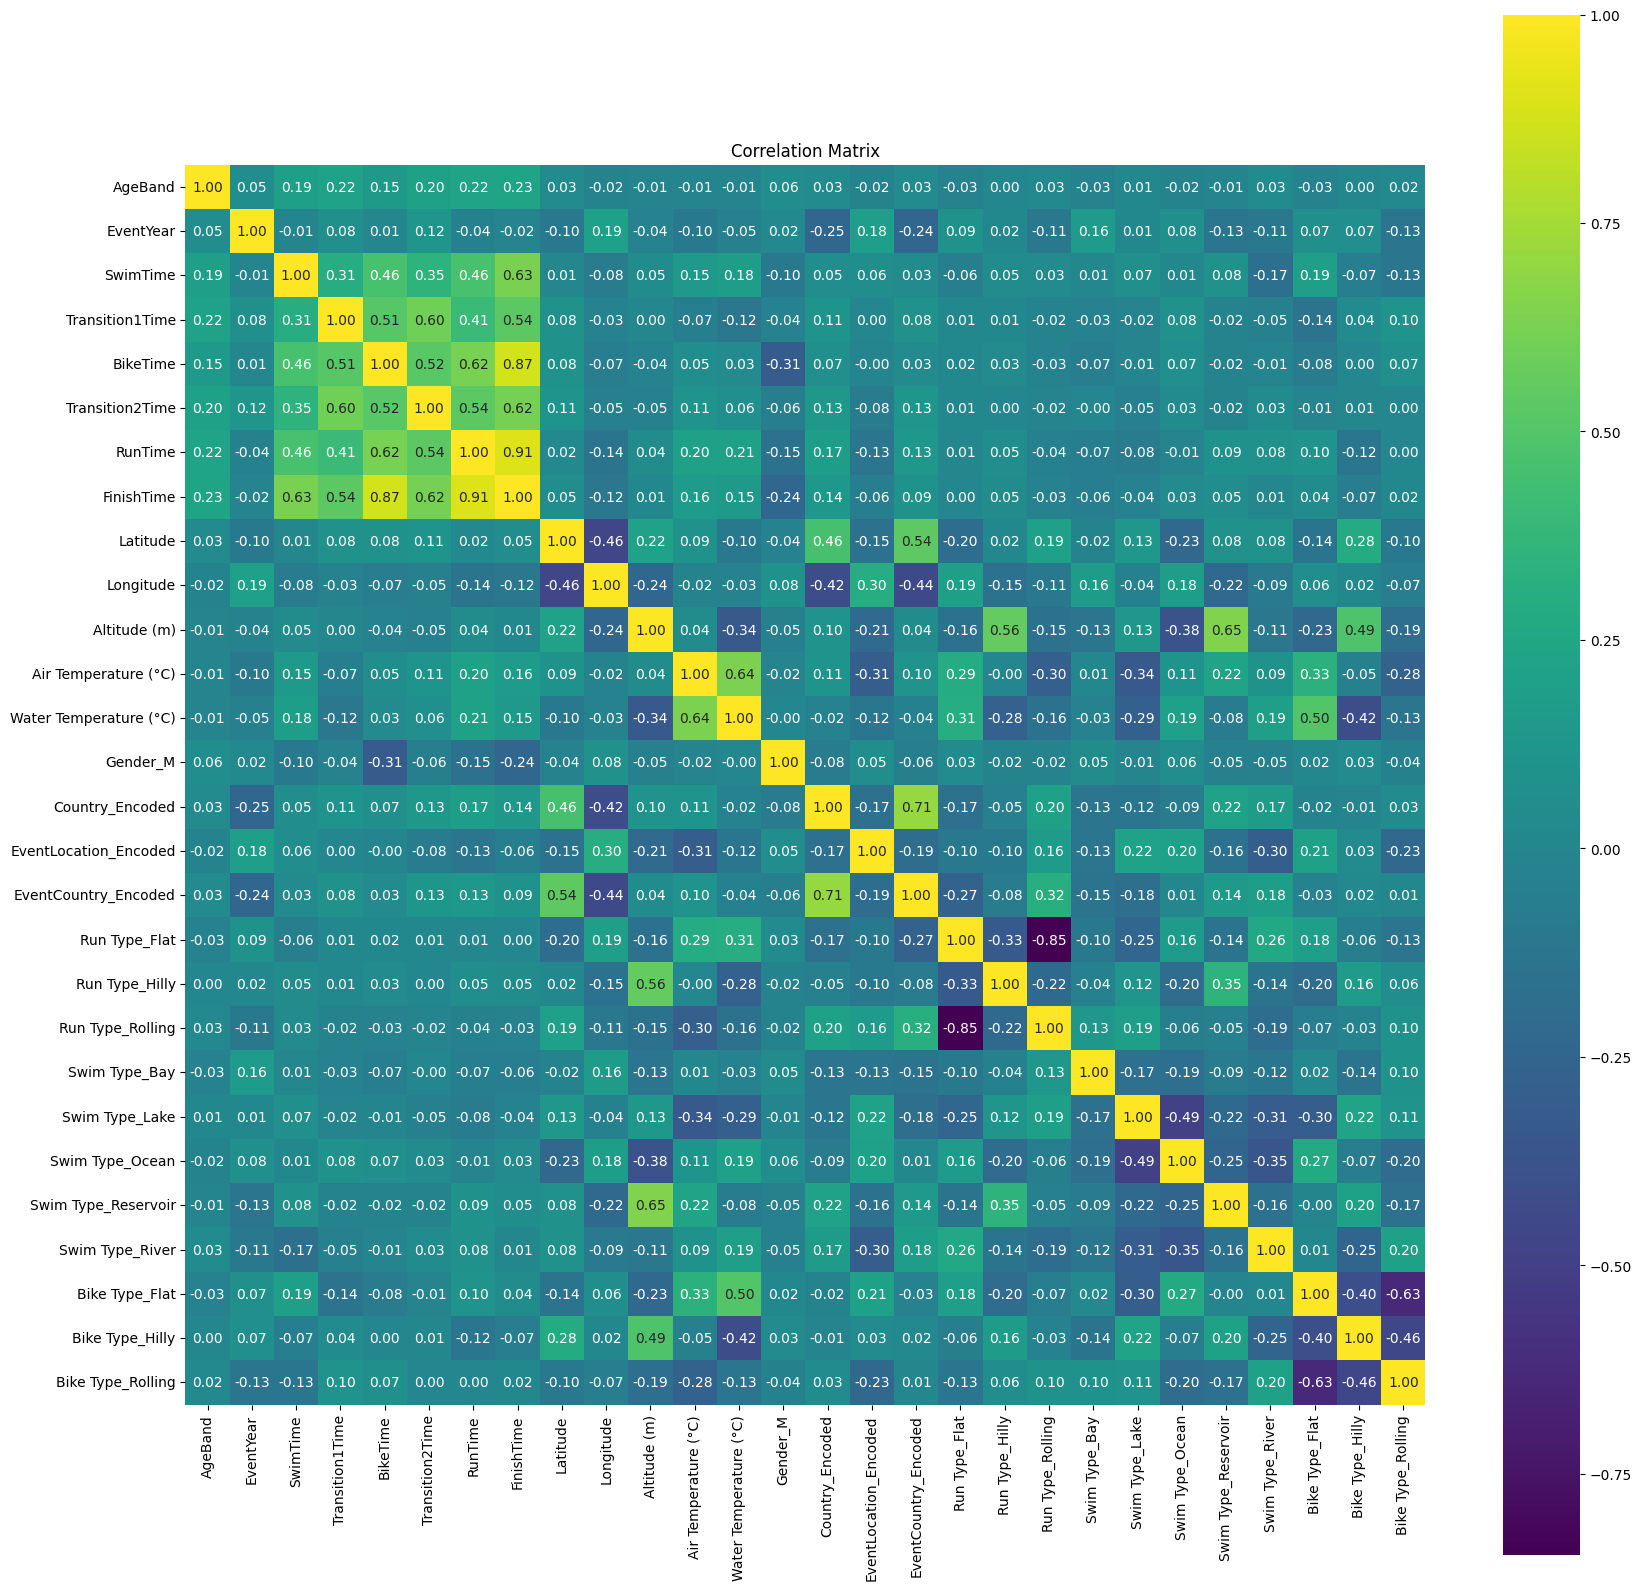

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Matriz de correlación para ver las relaciones entre variables
correlation_matrix = df_encoded.corr()

plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', square=True, cmap='viridis')
plt.title('Correlation Matrix')
plt.show()

In [78]:
df_encoded.columns

Index(['AgeBand', 'EventYear', 'SwimTime', 'Transition1Time', 'BikeTime',
       'Transition2Time', 'RunTime', 'FinishTime', 'Latitude', 'Longitude',
       'Altitude (m)', 'Air Temperature (°C)', 'Water Temperature (°C)',
       'Gender_M', 'Country_Encoded', 'EventLocation_Encoded',
       'EventCountry_Encoded', 'Run Type_Flat', 'Run Type_Hilly',
       'Run Type_Rolling', 'Swim Type_Bay', 'Swim Type_Lake',
       'Swim Type_Ocean', 'Swim Type_Reservoir', 'Swim Type_River',
       'Bike Type_Flat', 'Bike Type_Hilly', 'Bike Type_Rolling'],
      dtype='object')

## Model 1 - Run Time

In [84]:
df_run = df_encoded[['AgeBand', 'EventYear', 'Latitude', 'Longitude', 'Altitude (m)', 'Air Temperature (°C)', 'Water Temperature (°C)', 'Gender_M', 'Country_Encoded', 'EventLocation_Encoded', 'EventCountry_Encoded', 'Run Type_Flat', 'Run Type_Hilly', 'Run Type_Rolling', 'RunTime']]

In [126]:
# 2. Separar las variables predictoras (X) y la variable de respuesta (y)
X = df_run.drop(columns=['RunTime'])
y = df_run['RunTime'].values

In [127]:
X

,AgeBand,EventYear,Latitude,Longitude,Altitude (m),Air Temperature (°C),Water Temperature (°C),Gender_M,Country_Encoded,EventLocation_Encoded,EventCountry_Encoded,Run Type_Flat,Run Type_Hilly,Run Type_Rolling
0,35,2019,48.428318,-123.364953,23,18,19,1,5,60,4,1,0,0
1,35,2019,37.050096,-121.990590,11,18,17,1,5,51,28,1,0,0
2,35,2016,29.387225,-94.992736,2,21,22,1,5,58,28,0,0,1
3,45,2016,39.852045,3.118386,10,25,17,1,5,31,25,1,0,0
4,35,2016,46.123927,3.420371,252,28,25,0,5,59,9,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383497,50,2019,35.045722,-85.309488,210,22,22,1,222,9,28,0,0,1
383498,18,2014,43.616616,-116.200886,820,27,22,0,222,1,28,1,0,0
383499,40,2014,-30.705436,-69.198822,598,25,20,1,222,49,0,1,0,0
383500,25,2013,-30.705436,-69.198822,598,25,20,1,222,49,0,1,0,0


In [128]:
y

array([6384, 7007, 9147, ..., 8102, 7419, 7214])

In [129]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

# Verificar las formas de los conjuntos de datos
print("Tamaño del conjunto de entrenamiento (X_train, y_train):", X_train.shape, y_train.shape)
print("Tamaño del conjunto de prueba (X_test, y_test):", X_test.shape, y_test.shape)


Tamaño del conjunto de entrenamiento (X_train, y_train): (306801, 14) (306801,)
Tamaño del conjunto de prueba (X_test, y_test): (76701, 14) (76701,)


### Corr Matrix

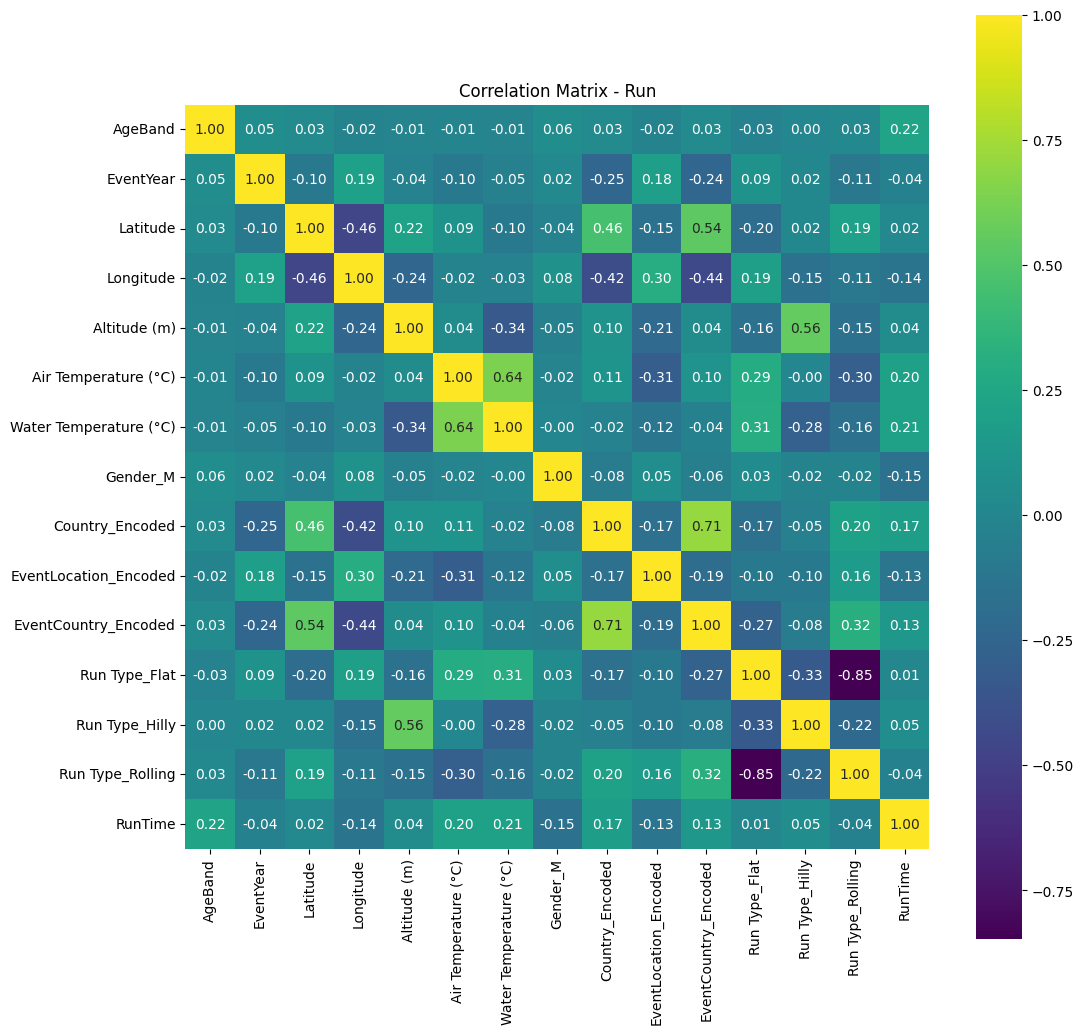

In [130]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Matriz de correlación para ver las relaciones entre variables
correlation_matrix = df_run.corr()

plt.figure(figsize=(12, 12))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', square=True, cmap='viridis')
plt.title('Correlation Matrix - Run')
plt.show()

### Linear Regressor

In [131]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error

# 3. **Entrenando Linear Regression**
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [132]:
# Predecir con el modelo de regresión lineal
y_pred_linear_test = linear_model.predict(X_test)
y_pred_linear_train = linear_model.predict(X_train)

In [133]:
dict_coefs_by_col = {col: round(coef, 5) for col, coef in zip(X.columns, linear_model.coef_)}
dict_coefs_by_col

{'AgeBand': np.float64(34.22304),
 'EventYear': np.float64(7.45759),
 'Latitude': np.float64(-6.26474),
 'Longitude': np.float64(-0.79684),
 'Altitude (m)': np.float64(0.23324),
 'Air Temperature (°C)': np.float64(19.55838),
 'Water Temperature (°C)': np.float64(104.08761),
 'Gender_M': np.float64(-541.5707),
 'Country_Encoded': np.float64(3.02403),
 'EventLocation_Encoded': np.float64(-2.18402),
 'EventCountry_Encoded': np.float64(8.47159),
 'Run Type_Flat': np.float64(-167.7491),
 'Run Type_Hilly': np.float64(332.57874),
 'Run Type_Rolling': np.float64(-164.82964)}

In [141]:
y_test

array([6617, 6175, 7552, ..., 7124, 9583, 7534])

In [140]:
y_pred_linear_test

array([7298.3167873 , 8045.62269488, 8081.0799007 , ..., 7279.71801879,
       8523.54742046, 6904.24642062])

In [143]:
df_lr = np.column_stack((y_test, y_pred_linear_test))  
df_lr = pd.DataFrame(df_lr, columns=['y_test', 'y_pred'])
df_lr

,y_test,y_pred
0,6617.0,7298.316787
1,6175.0,8045.622695
2,7552.0,8081.079901
3,8785.0,8703.222749
4,7438.0,6889.979096
...,...,...
76696,6832.0,6619.270123
76697,9130.0,8340.224839
76698,7124.0,7279.718019
76699,9583.0,8523.547420


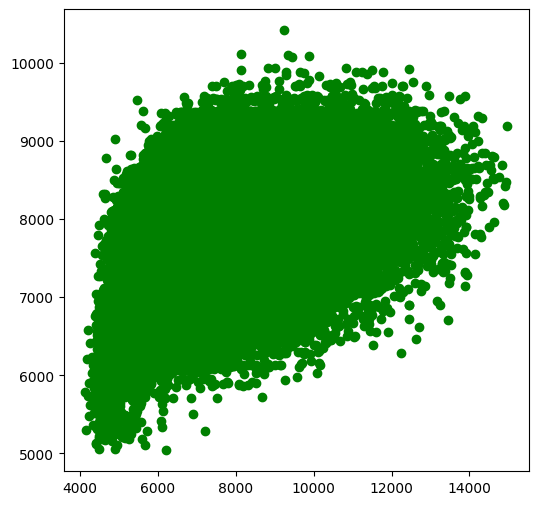

In [147]:
# Create a scatter plot with different colors for y_train and y_test
plt.figure(figsize=(6, 6))

# Plot y_train with one color (e.g., blue)
# plt.scatter(y_train, y_pred_linear_train, color='blue', label='y_train vs y_pred_train')

# Plot y_test with another color (e.g., green)
plt.scatter(y_test, y_pred_linear_test, color='green', label='y_test vs y_pred_test')


In [144]:
# Evaluar el modelo de regresión lineal

# Compute Score
print(f'Train R^2 Score: {r2_score(y_train, y_pred_linear_train)}')
print(f'Test R^2 Score: {r2_score(y_test, y_pred_linear_test)}\n')

# Compute MSE for training and testing sets 
print(f'Train MSE: {mean_squared_error(y_pred_linear_train, y_train)}')
print(f'Test MSE: {mean_squared_error(y_pred_linear_test, y_test)}\n')

# Compute RMSE for training and testing sets 
print(f'Train RMSE: {root_mean_squared_error(y_pred_linear_train, y_train)}')
print(f'Test RMSE: {root_mean_squared_error(y_pred_linear_test, y_test)}')

Train R^2 Score: 0.17355621689507617
Test R^2 Score: 0.1732329790361824

Train MSE: 2159213.563101137
Test MSE: 2171103.7624840005

Train RMSE: 1469.4262700459444
Test RMSE: 1473.4665800363443


### Random Forest

In [148]:
from sklearn.ensemble import RandomForestRegressor

# 4. **Entrenando Random Forest**
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [149]:
# Predecir con el modelo de Random Forest
y_pred_rf_test = rf_model.predict(X_test)
y_pred_rf_train = rf_model.predict(X_train)

In [150]:
df_rf = np.column_stack((y_test, y_pred_rf_test))  
df_rf = pd.DataFrame(df_rf, columns=['y_test', 'y_pred'])
df_rf

,y_test,y_pred
0,6617.0,7615.040345
1,6175.0,8641.687442
2,7552.0,9549.517857
3,8785.0,8596.286262
4,7438.0,6801.733113
...,...,...
76696,6832.0,7010.886011
76697,9130.0,7686.083784
76698,7124.0,8259.282317
76699,9583.0,8449.373833


In [151]:
# Evaluar el modelo de Random Forest

# Compute Score
print(f'Train R^2 Score: {r2_score(y_train, y_pred_rf_train)}')
print(f'Test R^2 Score: {r2_score(y_test, y_pred_rf_test)}\n')

# Compute MSE for training and testing sets 
print(f'Train MSE: {mean_squared_error(y_pred_rf_train, y_train)}')
print(f'Test MSE: {mean_squared_error(y_pred_rf_test, y_test)}\n')

# Compute RMSE for training and testing sets 
print(f'Train RMSE: {root_mean_squared_error(y_pred_rf_train, y_train)}')
print(f'Test RMSE: {root_mean_squared_error(y_pred_rf_test, y_test)}')

Train R^2 Score: 0.35161093478729677
Test R^2 Score: 0.23151503043648003

Train MSE: 1694017.7812384772
Test MSE: 2018054.1392262173

Train RMSE: 1301.5443831227874
Test RMSE: 1420.5823239876727


### XGBoost

In [152]:
import xgboost as xgb

# 5. **Entrenando XGBoost**
xgb_model = xgb.XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [153]:
# Predecir con el modelo de XGBoost
y_pred_xgb_test = xgb_model.predict(X_test)
y_pred_xgb_train = xgb_model.predict(X_train)

In [154]:
df_xgb = np.column_stack((y_test, y_pred_xgb_test))  
df_xgb = pd.DataFrame(df_xgb, columns=['y_test', 'y_pred'])
df_xgb

,y_test,y_pred
0,6617.0,7524.318359
1,6175.0,7875.658691
2,7552.0,8337.947266
3,8785.0,8388.855469
4,7438.0,6743.173340
...,...,...
76696,6832.0,6736.248047
76697,9130.0,7976.793457
76698,7124.0,8562.398438
76699,9583.0,8519.366211


In [155]:
# Evaluar el modelo de XGBoost

# Compute Score
print(f'Train R^2 Score: {r2_score(y_train, y_pred_xgb_train)}')
print(f'Test R^2 Score: {r2_score(y_test, y_pred_xgb_test)}\n')

# Compute MSE for training and testing sets 
print(f'Train MSE: {mean_squared_error(y_pred_xgb_train, y_train)}')
print(f'Test MSE: {mean_squared_error(y_pred_xgb_test, y_test)}\n')

# Compute RMSE for training and testing sets 
print(f'Train RMSE: {root_mean_squared_error(y_pred_xgb_train, y_train)}')
print(f'Test RMSE: {root_mean_squared_error(y_pred_xgb_test, y_test)}')

Train R^2 Score: 0.2872447371482849
Test R^2 Score: 0.27063971757888794

Train MSE: 1862184.5584041548
Test MSE: 1915312.037545408

Train RMSE: 1364.6188326430772
Test RMSE: 1383.9479894654307


## Model 1 - Run Time (with Standard Scaler)

In [160]:
df_run = df_encoded[['AgeBand', 'EventYear', 'Latitude', 'Longitude', 'Altitude (m)', 'Air Temperature (°C)', 'Water Temperature (°C)', 'Gender_M', 'Country_Encoded', 'EventLocation_Encoded', 'EventCountry_Encoded', 'Run Type_Flat', 'Run Type_Hilly', 'Run Type_Rolling', 'RunTime']]

In [161]:
# 2. Separar las variables predictoras (X) y la variable de respuesta (y)
X = df_run.drop(columns=['RunTime'])
y = df_run['RunTime'].values

In [162]:
X

,AgeBand,EventYear,Latitude,Longitude,Altitude (m),Air Temperature (°C),Water Temperature (°C),Gender_M,Country_Encoded,EventLocation_Encoded,EventCountry_Encoded,Run Type_Flat,Run Type_Hilly,Run Type_Rolling
0,35,2019,48.428318,-123.364953,23,18,19,1,5,60,4,1,0,0
1,35,2019,37.050096,-121.990590,11,18,17,1,5,51,28,1,0,0
2,35,2016,29.387225,-94.992736,2,21,22,1,5,58,28,0,0,1
3,45,2016,39.852045,3.118386,10,25,17,1,5,31,25,1,0,0
4,35,2016,46.123927,3.420371,252,28,25,0,5,59,9,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383497,50,2019,35.045722,-85.309488,210,22,22,1,222,9,28,0,0,1
383498,18,2014,43.616616,-116.200886,820,27,22,0,222,1,28,1,0,0
383499,40,2014,-30.705436,-69.198822,598,25,20,1,222,49,0,1,0,0
383500,25,2013,-30.705436,-69.198822,598,25,20,1,222,49,0,1,0,0


In [163]:
y

array([6384, 7007, 9147, ..., 8102, 7419, 7214])

In [164]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Verificar las formas de los conjuntos de datos
print("Tamaño del conjunto de entrenamiento (X_train_scaled, y_train):", X_train_scaled.shape, y_train.shape)
print("Tamaño del conjunto de prueba (X_test_scaled, y_test):", X_test_scaled.shape, y_test.shape)

Tamaño del conjunto de entrenamiento (X_train_scaled, y_train): (306801, 14) (306801,)
Tamaño del conjunto de prueba (X_test_scaled, y_test): (76701, 14) (76701,)


### Corr Matrix

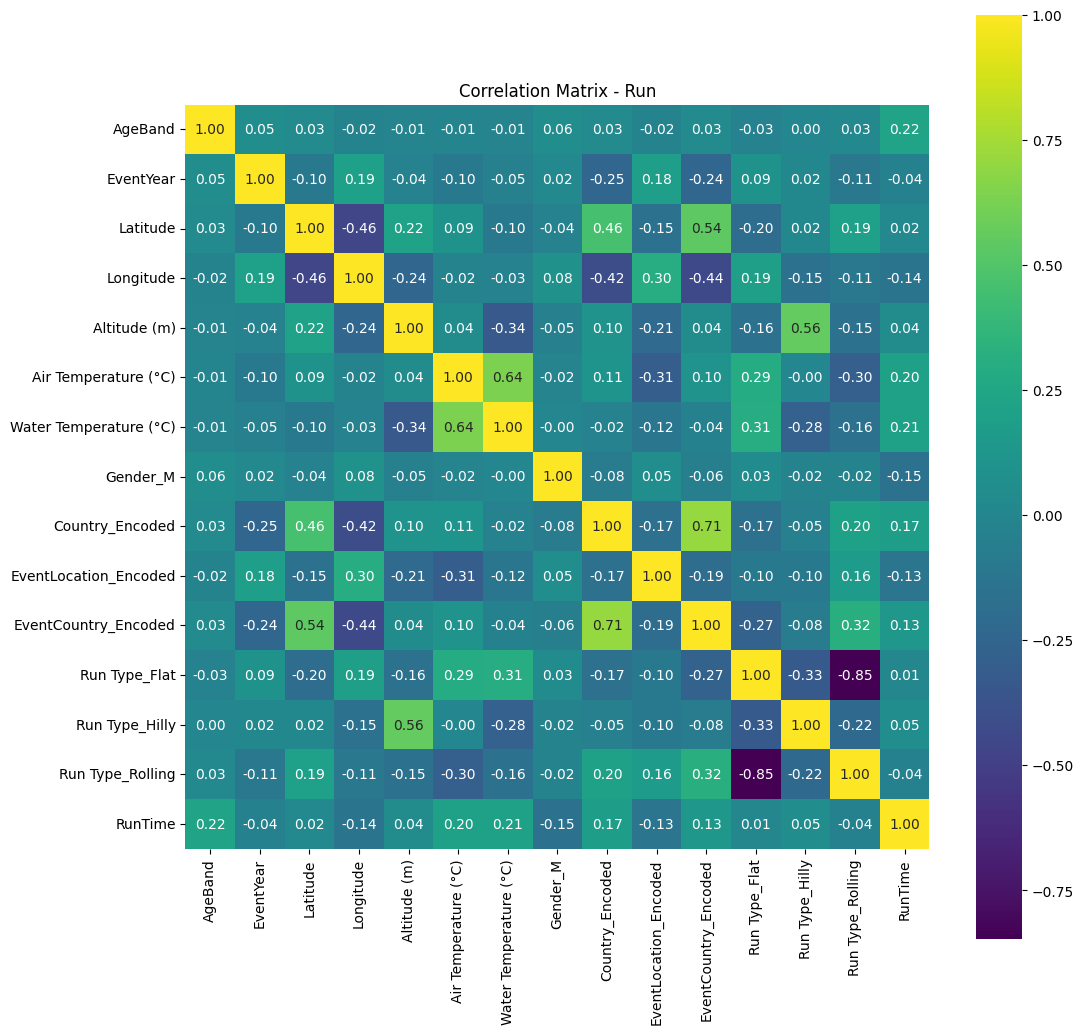

In [165]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Matriz de correlación para ver las relaciones entre variables
correlation_matrix = df_run.corr()

plt.figure(figsize=(12, 12))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', square=True, cmap='viridis')
plt.title('Correlation Matrix - Run')
plt.show()

### Linear Regressor

In [166]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error

# 3. **Entrenando Linear Regression**
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

LinearRegression()

In [167]:
# Predecir con el modelo de regresión lineal
y_pred_linear_test = linear_model.predict(X_test_scaled)
y_pred_linear_train = linear_model.predict(X_train_scaled)

In [168]:
dict_coefs_by_col = {col: round(coef, 5) for col, coef in zip(X.columns, linear_model.coef_)}
dict_coefs_by_col

{'AgeBand': np.float64(368.51453),
 'EventYear': np.float64(24.41241),
 'Latitude': np.float64(-169.84582),
 'Longitude': np.float64(-68.85206),
 'Altitude (m)': np.float64(82.52105),
 'Air Temperature (°C)': np.float64(69.5224),
 'Water Temperature (°C)': np.float64(355.4019),
 'Gender_M': np.float64(-236.14741),
 'Country_Encoded': np.float64(233.23297),
 'EventLocation_Encoded': np.float64(-43.58331),
 'EventCountry_Encoded': np.float64(89.90897),
 'Run Type_Flat': np.float64(-437933644145634.56),
 'Run Type_Hilly': np.float64(-239383985415824.56),
 'Run Type_Rolling': np.float64(-423820816277658.2)}

In [169]:
y_test

array([6617, 6175, 7552, ..., 7124, 9583, 7534])

In [170]:
y_pred_linear_test

array([7299.59765203, 8040.97265203, 8081.78515203, ..., 7274.97265203,
       8520.72265203, 6902.66015203])

In [171]:
df_lr = np.column_stack((y_test, y_pred_linear_test))  
df_lr = pd.DataFrame(df_lr, columns=['y_test', 'y_pred'])
df_lr

,y_test,y_pred
0,6617.0,7299.597652
1,6175.0,8040.972652
2,7552.0,8081.785152
3,8785.0,8700.535152
4,7438.0,6887.910152
...,...,...
76696,6832.0,6617.035152
76697,9130.0,8337.097652
76698,7124.0,7274.972652
76699,9583.0,8520.722652


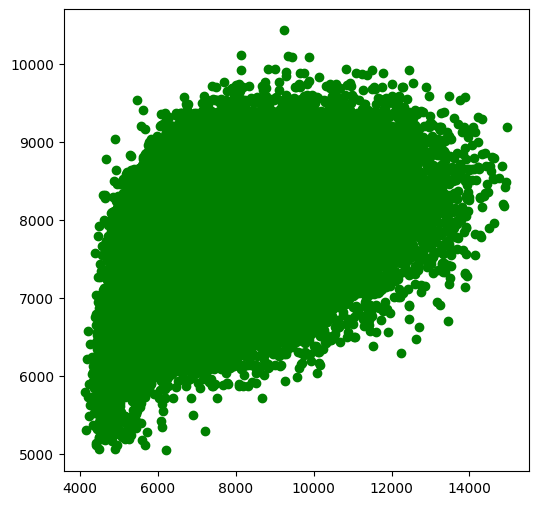

In [172]:
# Create a scatter plot with different colors for y_train and y_test
plt.figure(figsize=(6, 6))

# Plot y_train with one color (e.g., blue)
# plt.scatter(y_train, y_pred_linear_train, color='blue', label='y_train vs y_pred_train')

# Plot y_test with another color (e.g., green)
plt.scatter(y_test, y_pred_linear_test, color='green', label='y_test vs y_pred_test')


In [173]:
# Evaluar el modelo de regresión lineal

# Compute Score
print(f'Train R^2 Score: {r2_score(y_train, y_pred_linear_train)}')
print(f'Test R^2 Score: {r2_score(y_test, y_pred_linear_test)}\n')

# Compute MSE for training and testing sets 
print(f'Train MSE: {mean_squared_error(y_pred_linear_train, y_train)}')
print(f'Test MSE: {mean_squared_error(y_pred_linear_test, y_test)}\n')

# Compute RMSE for training and testing sets 
print(f'Train RMSE: {root_mean_squared_error(y_pred_linear_train, y_train)}')
print(f'Test RMSE: {root_mean_squared_error(y_pred_linear_test, y_test)}')

Train R^2 Score: 0.17355297185830787
Test R^2 Score: 0.17324759171675908

Train MSE: 2159222.041266919
Test MSE: 2171065.3893450443

Train RMSE: 1469.429154898908
Test RMSE: 1473.4535585979777


### Random Forest

In [174]:
from sklearn.ensemble import RandomForestRegressor

# 4. **Entrenando Random Forest**
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [175]:
# Predecir con el modelo de Random Forest
y_pred_rf_test = rf_model.predict(X_test_scaled)
y_pred_rf_train = rf_model.predict(X_train_scaled)

In [176]:
df_rf = np.column_stack((y_test, y_pred_rf_test))  
df_rf = pd.DataFrame(df_rf, columns=['y_test', 'y_pred'])
df_rf

,y_test,y_pred
0,6617.0,7615.040345
1,6175.0,8641.687442
2,7552.0,9620.147857
3,8785.0,8596.286262
4,7438.0,6801.733113
...,...,...
76696,6832.0,7010.886011
76697,9130.0,7686.083784
76698,7124.0,8259.282317
76699,9583.0,8449.373833


In [177]:
# Evaluar el modelo de Random Forest

# Compute Score
print(f'Train R^2 Score: {r2_score(y_train, y_pred_rf_train)}')
print(f'Test R^2 Score: {r2_score(y_test, y_pred_rf_test)}\n')

# Compute MSE for training and testing sets 
print(f'Train MSE: {mean_squared_error(y_pred_rf_train, y_train)}')
print(f'Test MSE: {mean_squared_error(y_pred_rf_test, y_test)}\n')

# Compute RMSE for training and testing sets 
print(f'Train RMSE: {root_mean_squared_error(y_pred_rf_train, y_train)}')
print(f'Test RMSE: {root_mean_squared_error(y_pred_rf_test, y_test)}')

Train R^2 Score: 0.35160643882385767
Test R^2 Score: 0.23150091047341137

Train MSE: 1694029.5276457167
Test MSE: 2018091.2184809132

Train RMSE: 1301.5488956031259
Test RMSE: 1420.5953746513865


### XGBoost

In [178]:
import xgboost as xgb

# 5. **Entrenando XGBoost**
xgb_model = xgb.XGBRegressor(random_state=42)
xgb_model.fit(X_train_scaled, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [179]:
# Predecir con el modelo de XGBoost
y_pred_xgb_test = xgb_model.predict(X_test_scaled)
y_pred_xgb_train = xgb_model.predict(X_train_scaled)

In [180]:
df_xgb = np.column_stack((y_test, y_pred_xgb_test))  
df_xgb = pd.DataFrame(df_xgb, columns=['y_test', 'y_pred'])
df_xgb

,y_test,y_pred
0,6617.0,7524.318359
1,6175.0,7875.658691
2,7552.0,8337.947266
3,8785.0,8388.855469
4,7438.0,6743.173340
...,...,...
76696,6832.0,6736.248047
76697,9130.0,7976.793457
76698,7124.0,8562.398438
76699,9583.0,8519.366211


In [181]:
# Evaluar el modelo de XGBoost

# Compute Score
print(f'Train R^2 Score: {r2_score(y_train, y_pred_xgb_train)}')
print(f'Test R^2 Score: {r2_score(y_test, y_pred_xgb_test)}\n')

# Compute MSE for training and testing sets 
print(f'Train MSE: {mean_squared_error(y_pred_xgb_train, y_train)}')
print(f'Test MSE: {mean_squared_error(y_pred_xgb_test, y_test)}\n')

# Compute RMSE for training and testing sets 
print(f'Train RMSE: {root_mean_squared_error(y_pred_xgb_train, y_train)}')
print(f'Test RMSE: {root_mean_squared_error(y_pred_xgb_test, y_test)}')

Train R^2 Score: 0.2872447371482849
Test R^2 Score: 0.27063971757888794

Train MSE: 1862184.5584041548
Test MSE: 1915312.037545408

Train RMSE: 1364.6188326430772
Test RMSE: 1383.9479894654307
